***Final code for thesis book***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
input_path = '/content/drive/MyDrive/Temporary/train_modi_ck'

In [ ]:
# Ignore  the warnings
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True, font_scale=1.5)

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# preprocess.
from keras.preprocessing.image import ImageDataGenerator

# dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D,BatchNormalization , MaxPooling2D, GlobalAveragePooling2D

import tensorflow as tf
import random as rn
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
from imutils import paths
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk


In [ ]:
for dir_ in os.listdir(input_path):

    count = 0
    for f in os.listdir(input_path + "/"+ dir_ ):
        count += 1
    print(f"{dir_} has {count} number of images")

sad has 204 number of images
happy has 216 number of images
angry has 160 number of images
surprise has 224 number of images


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.7MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
X = []              #  initilize a list for image array
Z = []              #  initialize a list for image label

ANGER_DIR='/content/drive/MyDrive/Temporary/train_modi_ck/angry'
HAPPY_DIR='/content/drive/MyDrive/Temporary/train_modi_ck/happy'
SADNESS_DIR='/content/drive/MyDrive/Temporary/train_modi_ck/sad'
SURPRISE_DIR='/content/drive/MyDrive/Temporary/train_modi_ck/surprise'


def assign_label(img, emotion_type):
    return emotion_type

def make_train_data(emotion_type, DIR,c,b,f):
    
    for img in tqdm(os.listdir(DIR)):
        c=c+1
        label = assign_label(img, emotion_type)             #   emotion class of the selected image assign into the 'label' variable
        
        path = os.path.join(DIR, img)
        img =  cv2.imread(path)[:,:,::-1]
        # fig, axes = plt.subplots(1,4,figsize = (8,4))
        # ax = axes.ravel()   
        
        faces = detector.detect_faces(img)
        if faces:
          b=b+1
        #   print("True")
       
          twidth, theight = 0,0
          for result in faces:
            
            # get coordinates
            x, y, width, height = result['box']
            print(f"x = {x}, y = {y}, w = {width}, h = {height}")
            if width > twidth and height >theight:
              twidth , theight = width , height
              x2,y2= x+twidth , y+theight
              roi = img[ y:y2 , x:x2 ]
              roi = roi[:,:,::-1]
              roi_gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
              roi_gray = cv2.resize(roi_gray, (120,120))
              selem = disk(20)
              eroted_img = erosion(roi_gray , selem)
              new_img = roi_gray - eroted_img
            else:
              continue
            
          
          # ax[0].imshow(roi)
          # ax[0].set_title('Roi')

          # ax[1].imshow(roi_gray, cmap=plt.cm.gray)
          # ax[1].set_title('Roi_Gray')

          # ax[2].imshow(new_img)
          # ax[2].set_title('erosion_subtracted')

          # ax[3].imshow(img[:,:,::-1])
          # ax[3].set_title( "Detected face")

          
          # plt.show()


          X.append(np.array(new_img))
          Z.append(str(label))
        else:
          f=f+1
          print("False")     
         
    return c,b,f   
   
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
c,b,f = 0,0,0
c,b,f=make_train_data('Anger', ANGER_DIR,c,b,f)
print(f"c ={c}\nb = {b}\nf = {f}")

  1%|          | 1/160 [00:02<05:19,  2.01s/it]

True
x = 167, y = 179, w = 149, h = 194


  1%|▏         | 2/160 [00:03<04:37,  1.75s/it]

True
x = 163, y = 135, w = 169, h = 218


  2%|▏         | 3/160 [00:04<04:07,  1.58s/it]

True
x = 159, y = 156, w = 167, h = 214


  2%|▎         | 4/160 [00:05<03:45,  1.45s/it]

True
x = 164, y = 144, w = 163, h = 193


  3%|▎         | 5/160 [00:06<03:22,  1.31s/it]

True
x = 167, y = 179, w = 149, h = 194


  4%|▍         | 6/160 [00:07<03:12,  1.25s/it]

True
x = 175, y = 130, w = 162, h = 207


  4%|▍         | 7/160 [00:08<02:59,  1.17s/it]

True
x = 165, y = 152, w = 160, h = 198


  5%|▌         | 8/160 [00:09<02:57,  1.17s/it]

True
x = 149, y = 134, w = 177, h = 243


  6%|▌         | 9/160 [00:10<02:47,  1.11s/it]

True
x = 159, y = 156, w = 167, h = 214


  6%|▋         | 10/160 [00:11<02:44,  1.10s/it]

True
x = 165, y = 152, w = 160, h = 198


  7%|▋         | 11/160 [00:12<02:36,  1.05s/it]

True
x = 175, y = 130, w = 162, h = 207


  8%|▊         | 12/160 [00:13<02:44,  1.11s/it]

True
x = 172, y = 158, w = 175, h = 213
x = 396, y = 327, w = 78, h = 97


  8%|▊         | 13/160 [00:15<02:40,  1.09s/it]

True
x = 163, y = 135, w = 169, h = 218


  9%|▉         | 14/160 [00:15<02:31,  1.04s/it]

True
x = 172, y = 158, w = 175, h = 213
x = 396, y = 327, w = 78, h = 97


  9%|▉         | 15/160 [00:16<02:27,  1.02s/it]

True
x = 149, y = 134, w = 177, h = 243


 10%|█         | 16/160 [00:17<02:24,  1.00s/it]

True
x = 164, y = 144, w = 163, h = 193


 11%|█         | 17/160 [00:18<02:28,  1.04s/it]

True
x = 195, y = 140, w = 140, h = 188


 11%|█▏        | 18/160 [00:20<02:36,  1.10s/it]

True
x = 166, y = 145, w = 140, h = 186


 12%|█▏        | 19/160 [00:21<02:35,  1.10s/it]

True
x = 176, y = 165, w = 169, h = 208


 12%|█▎        | 20/160 [00:22<02:27,  1.05s/it]

True
x = 167, y = 138, w = 148, h = 195
x = 16, y = 165, w = 91, h = 112


 13%|█▎        | 21/160 [00:23<02:23,  1.03s/it]

True
x = 168, y = 157, w = 151, h = 196


 14%|█▍        | 22/160 [00:24<02:29,  1.08s/it]

True
x = 161, y = 135, w = 154, h = 188


 14%|█▍        | 23/160 [00:25<02:36,  1.14s/it]

True
x = 172, y = 143, w = 161, h = 198
x = 236, y = 329, w = 64, h = 67


 15%|█▌        | 24/160 [00:26<02:37,  1.16s/it]

True
x = 171, y = 174, w = 156, h = 200


 16%|█▌        | 25/160 [00:28<02:34,  1.15s/it]

True
x = 166, y = 146, w = 173, h = 222


 16%|█▋        | 26/160 [00:28<02:24,  1.08s/it]

True
x = 167, y = 138, w = 148, h = 195
x = 16, y = 165, w = 91, h = 112


 17%|█▋        | 27/160 [00:30<02:25,  1.09s/it]

True
x = 153, y = 189, w = 157, h = 209


 18%|█▊        | 28/160 [00:31<02:29,  1.13s/it]

True
x = 151, y = 128, w = 154, h = 207


 18%|█▊        | 29/160 [00:32<02:28,  1.13s/it]

True
x = 157, y = 155, w = 173, h = 226


 19%|█▉        | 30/160 [00:33<02:26,  1.13s/it]

True
x = 181, y = 146, w = 149, h = 197


 19%|█▉        | 31/160 [00:34<02:31,  1.17s/it]

True
x = 155, y = 130, w = 161, h = 199


 20%|██        | 32/160 [00:36<02:29,  1.17s/it]

True
x = 185, y = 152, w = 130, h = 167


 21%|██        | 33/160 [00:37<02:27,  1.16s/it]

True
x = 169, y = 206, w = 161, h = 186


 21%|██▏       | 34/160 [00:38<02:24,  1.15s/it]

True
x = 159, y = 148, w = 149, h = 202


 22%|██▏       | 35/160 [00:39<02:23,  1.14s/it]

True
x = 170, y = 173, w = 143, h = 190


 22%|██▎       | 36/160 [00:40<02:22,  1.15s/it]

True
x = 158, y = 145, w = 148, h = 176


 23%|██▎       | 37/160 [00:41<02:20,  1.14s/it]

True
x = 162, y = 150, w = 171, h = 228


 24%|██▍       | 38/160 [00:42<02:18,  1.14s/it]

True
x = 142, y = 142, w = 159, h = 216


 24%|██▍       | 39/160 [00:43<02:16,  1.12s/it]

True
x = 184, y = 140, w = 155, h = 215


 25%|██▌       | 40/160 [00:45<02:14,  1.12s/it]

True
x = 155, y = 124, w = 177, h = 234


 26%|██▌       | 41/160 [00:46<02:15,  1.14s/it]

True
x = 190, y = 153, w = 144, h = 188


 26%|██▋       | 42/160 [00:47<02:15,  1.15s/it]

True
x = 169, y = 147, w = 169, h = 214


 27%|██▋       | 43/160 [00:48<02:07,  1.09s/it]

True
x = 172, y = 143, w = 161, h = 198
x = 236, y = 329, w = 64, h = 67


 28%|██▊       | 44/160 [00:49<02:11,  1.14s/it]

True
x = 187, y = 157, w = 136, h = 183


 28%|██▊       | 45/160 [00:50<02:15,  1.18s/it]

True
x = 171, y = 147, w = 173, h = 222


 29%|██▉       | 46/160 [00:51<02:11,  1.15s/it]

True
x = 165, y = 149, w = 151, h = 177


 29%|██▉       | 47/160 [00:52<02:02,  1.09s/it]

True
x = 162, y = 150, w = 171, h = 228


 30%|███       | 48/160 [00:53<01:59,  1.07s/it]

True
x = 175, y = 147, w = 135, h = 179


 31%|███       | 49/160 [00:54<01:53,  1.03s/it]

True
x = 157, y = 155, w = 173, h = 226


 31%|███▏      | 50/160 [00:56<02:04,  1.13s/it]

True
x = 163, y = 202, w = 152, h = 195


 32%|███▏      | 51/160 [00:57<02:01,  1.11s/it]

True
x = 172, y = 146, w = 155, h = 187


 32%|███▎      | 52/160 [00:58<02:06,  1.17s/it]

True
x = 177, y = 130, w = 141, h = 182


 33%|███▎      | 53/160 [00:59<02:09,  1.21s/it]

True
x = 159, y = 159, w = 143, h = 174


 34%|███▍      | 54/160 [01:01<02:09,  1.22s/it]

True
x = 159, y = 165, w = 159, h = 201


 34%|███▍      | 55/160 [01:02<02:09,  1.23s/it]

True
x = 154, y = 123, w = 169, h = 222


 35%|███▌      | 56/160 [01:03<02:06,  1.22s/it]

True
x = 217, y = 143, w = 147, h = 198


 36%|███▌      | 57/160 [01:04<02:06,  1.23s/it]

True
x = 157, y = 109, w = 176, h = 253


 36%|███▋      | 58/160 [01:05<01:56,  1.14s/it]

True
x = 171, y = 147, w = 173, h = 222


 37%|███▋      | 59/160 [01:06<01:53,  1.13s/it]

True
x = 159, y = 148, w = 149, h = 202


 38%|███▊      | 60/160 [01:07<01:49,  1.09s/it]

True
x = 155, y = 139, w = 153, h = 206


 38%|███▊      | 61/160 [01:08<01:42,  1.04s/it]

True
x = 155, y = 139, w = 153, h = 206


 39%|███▉      | 62/160 [01:10<01:47,  1.09s/it]

True
x = 171, y = 160, w = 161, h = 215
x = 42, y = 463, w = 20, h = 25


 39%|███▉      | 63/160 [01:11<01:48,  1.12s/it]

True
x = 160, y = 166, w = 156, h = 207


 40%|████      | 64/160 [01:12<01:48,  1.13s/it]

True
x = 155, y = 162, w = 164, h = 216


 41%|████      | 65/160 [01:13<01:42,  1.08s/it]

True
x = 176, y = 165, w = 169, h = 208


 41%|████▏     | 66/160 [01:14<01:42,  1.09s/it]

True
x = 171, y = 154, w = 147, h = 190


 42%|████▏     | 67/160 [01:15<01:42,  1.11s/it]

True
x = 185, y = 144, w = 132, h = 177


 42%|████▎     | 68/160 [01:16<01:42,  1.12s/it]

True
x = 142, y = 176, w = 169, h = 207


 43%|████▎     | 69/160 [01:17<01:41,  1.12s/it]

True
x = 163, y = 202, w = 152, h = 195


 44%|████▍     | 70/160 [01:19<01:42,  1.14s/it]

True
x = 173, y = 166, w = 136, h = 184


 44%|████▍     | 71/160 [01:19<01:36,  1.09s/it]

True
x = 185, y = 144, w = 132, h = 177


 45%|████▌     | 72/160 [01:21<01:34,  1.07s/it]

True
x = 217, y = 143, w = 147, h = 198


 46%|████▌     | 73/160 [01:22<01:35,  1.09s/it]

True
x = 154, y = 173, w = 174, h = 207


 46%|████▋     | 74/160 [01:23<01:34,  1.10s/it]

True
x = 173, y = 166, w = 136, h = 184


 47%|████▋     | 75/160 [01:24<01:35,  1.13s/it]

True
x = 161, y = 142, w = 167, h = 214


 48%|████▊     | 76/160 [01:25<01:35,  1.14s/it]

True
x = 155, y = 144, w = 163, h = 222


 48%|████▊     | 77/160 [01:26<01:34,  1.14s/it]

True
x = 191, y = 184, w = 132, h = 183


 49%|████▉     | 78/160 [01:27<01:30,  1.10s/it]

True
x = 162, y = 156, w = 158, h = 201


 49%|████▉     | 79/160 [01:28<01:27,  1.08s/it]

True
x = 184, y = 140, w = 155, h = 215


 50%|█████     | 80/160 [01:30<01:30,  1.13s/it]

True
x = 155, y = 144, w = 163, h = 222


 51%|█████     | 81/160 [01:31<01:26,  1.09s/it]

True
x = 171, y = 174, w = 156, h = 200


 51%|█████▏    | 82/160 [01:32<01:26,  1.11s/it]

True
x = 163, y = 171, w = 168, h = 214


 52%|█████▏    | 83/160 [01:33<01:21,  1.06s/it]

True
x = 142, y = 142, w = 159, h = 216


 52%|█████▎    | 84/160 [01:34<01:18,  1.03s/it]

True
x = 160, y = 166, w = 156, h = 207


 53%|█████▎    | 85/160 [01:35<01:15,  1.00s/it]

True
x = 163, y = 171, w = 168, h = 214


 54%|█████▍    | 86/160 [01:36<01:13,  1.00it/s]

True
x = 154, y = 123, w = 169, h = 222


 54%|█████▍    | 87/160 [01:37<01:12,  1.00it/s]

True
x = 187, y = 157, w = 136, h = 183


 55%|█████▌    | 88/160 [01:38<01:12,  1.01s/it]

True
x = 161, y = 135, w = 154, h = 188


 56%|█████▌    | 89/160 [01:39<01:15,  1.07s/it]

True
x = 180, y = 180, w = 151, h = 197


 56%|█████▋    | 90/160 [01:40<01:12,  1.04s/it]

True
x = 165, y = 149, w = 151, h = 177


 57%|█████▋    | 91/160 [01:41<01:10,  1.03s/it]

True
x = 190, y = 153, w = 144, h = 188


 57%|█████▊    | 92/160 [01:42<01:08,  1.01s/it]

True
x = 150, y = 127, w = 186, h = 238


 58%|█████▊    | 93/160 [01:43<01:09,  1.04s/it]

True
x = 167, y = 148, w = 136, h = 180


 59%|█████▉    | 94/160 [01:44<01:07,  1.02s/it]

True
x = 170, y = 173, w = 143, h = 190


 59%|█████▉    | 95/160 [01:45<01:05,  1.01s/it]

True
x = 169, y = 147, w = 169, h = 214


 60%|██████    | 96/160 [01:46<01:04,  1.01s/it]

True
x = 177, y = 130, w = 141, h = 182


 61%|██████    | 97/160 [01:47<01:02,  1.01it/s]

True
x = 162, y = 156, w = 158, h = 201


 61%|██████▏   | 98/160 [01:48<01:01,  1.02it/s]

True
x = 157, y = 109, w = 176, h = 253


 62%|██████▏   | 99/160 [01:49<00:58,  1.04it/s]

True
x = 154, y = 173, w = 174, h = 207


 62%|██████▎   | 100/160 [01:50<01:01,  1.02s/it]

True
x = 150, y = 127, w = 186, h = 238


 63%|██████▎   | 101/160 [01:51<01:01,  1.04s/it]

True
x = 171, y = 154, w = 147, h = 190


 64%|██████▍   | 102/160 [01:52<00:59,  1.02s/it]

True
x = 181, y = 149, w = 139, h = 186


 64%|██████▍   | 103/160 [01:53<00:56,  1.02it/s]

True
x = 191, y = 184, w = 132, h = 183


 65%|██████▌   | 104/160 [01:54<00:53,  1.04it/s]

True
x = 167, y = 148, w = 136, h = 180


 66%|██████▌   | 105/160 [01:55<00:59,  1.09s/it]

True
x = 171, y = 123, w = 155, h = 216


 66%|██████▋   | 106/160 [01:56<00:57,  1.07s/it]

True
x = 171, y = 160, w = 161, h = 215
x = 42, y = 463, w = 20, h = 25


 67%|██████▋   | 107/160 [01:57<00:55,  1.05s/it]

True
x = 172, y = 146, w = 155, h = 187


 68%|██████▊   | 108/160 [01:58<00:55,  1.07s/it]

True
x = 163, y = 115, w = 164, h = 203


 68%|██████▊   | 109/160 [01:59<00:52,  1.04s/it]

True
x = 181, y = 149, w = 139, h = 186


 69%|██████▉   | 110/160 [02:00<00:50,  1.01s/it]

True
x = 166, y = 146, w = 173, h = 222


 69%|██████▉   | 111/160 [02:01<00:49,  1.01s/it]

True
x = 153, y = 189, w = 157, h = 209


 70%|███████   | 112/160 [02:02<00:47,  1.00it/s]

True
x = 185, y = 152, w = 130, h = 167


 71%|███████   | 113/160 [02:03<00:46,  1.01it/s]

True
x = 181, y = 146, w = 149, h = 197


 71%|███████▏  | 114/160 [02:04<00:44,  1.02it/s]

True
x = 166, y = 145, w = 140, h = 186


 72%|███████▏  | 115/160 [02:05<00:43,  1.03it/s]

True
x = 155, y = 162, w = 164, h = 216


 72%|███████▎  | 116/160 [02:06<00:43,  1.01it/s]

True
x = 159, y = 165, w = 159, h = 201


 73%|███████▎  | 117/160 [02:07<00:43,  1.00s/it]

True
x = 158, y = 145, w = 148, h = 176


 74%|███████▍  | 118/160 [02:08<00:41,  1.02it/s]

True
x = 151, y = 128, w = 154, h = 207


 74%|███████▍  | 119/160 [02:09<00:40,  1.02it/s]

True
x = 168, y = 157, w = 151, h = 196


 75%|███████▌  | 120/160 [02:10<00:38,  1.03it/s]

True
x = 163, y = 115, w = 164, h = 203


 76%|███████▌  | 121/160 [02:11<00:38,  1.02it/s]

True
x = 155, y = 124, w = 177, h = 234


 76%|███████▋  | 122/160 [02:12<00:38,  1.01s/it]

True
x = 159, y = 159, w = 143, h = 174


 77%|███████▋  | 123/160 [02:13<00:38,  1.03s/it]

True
x = 161, y = 142, w = 167, h = 214


 78%|███████▊  | 124/160 [02:14<00:36,  1.03s/it]

True
x = 180, y = 180, w = 151, h = 197


 78%|███████▊  | 125/160 [02:15<00:35,  1.00s/it]

True
x = 155, y = 130, w = 161, h = 199


 79%|███████▉  | 126/160 [02:16<00:33,  1.00it/s]

True
x = 175, y = 147, w = 135, h = 179


 79%|███████▉  | 127/160 [02:17<00:35,  1.07s/it]

True
x = 156, y = 162, w = 168, h = 221


 80%|████████  | 128/160 [02:18<00:34,  1.08s/it]

True
x = 195, y = 140, w = 140, h = 188


 81%|████████  | 129/160 [02:19<00:32,  1.03s/it]

True
x = 171, y = 123, w = 155, h = 216


 81%|████████▏ | 130/160 [02:20<00:30,  1.02s/it]

True
x = 156, y = 162, w = 168, h = 221


 82%|████████▏ | 131/160 [02:21<00:30,  1.05s/it]

True
x = 142, y = 176, w = 169, h = 207


 82%|████████▎ | 132/160 [02:22<00:28,  1.02s/it]

True
x = 169, y = 206, w = 161, h = 186


 83%|████████▎ | 133/160 [02:23<00:28,  1.05s/it]

True
x = 178, y = 149, w = 158, h = 211


 84%|████████▍ | 134/160 [02:25<00:28,  1.09s/it]

True
x = 159, y = 151, w = 150, h = 200


 84%|████████▍ | 135/160 [02:26<00:27,  1.10s/it]

True
x = 156, y = 158, w = 169, h = 235


 85%|████████▌ | 136/160 [02:27<00:26,  1.09s/it]

True
x = 167, y = 166, w = 148, h = 193


 86%|████████▌ | 137/160 [02:28<00:24,  1.06s/it]

True
x = 159, y = 151, w = 150, h = 200


 86%|████████▋ | 138/160 [02:29<00:23,  1.05s/it]

True
x = 162, y = 141, w = 174, h = 220


 87%|████████▋ | 139/160 [02:30<00:22,  1.08s/it]

True
x = 181, y = 154, w = 131, h = 166


 88%|████████▊ | 140/160 [02:31<00:20,  1.04s/it]

True
x = 178, y = 149, w = 158, h = 211


 88%|████████▊ | 141/160 [02:32<00:20,  1.09s/it]

True
x = 164, y = 166, w = 156, h = 209


 89%|████████▉ | 142/160 [02:33<00:18,  1.05s/it]

True
x = 156, y = 158, w = 169, h = 235


 89%|████████▉ | 143/160 [02:34<00:18,  1.08s/it]

True
x = 156, y = 173, w = 152, h = 209


 90%|█████████ | 144/160 [02:35<00:16,  1.03s/it]

True
x = 156, y = 173, w = 152, h = 209


 91%|█████████ | 145/160 [02:36<00:15,  1.06s/it]

True
x = 167, y = 166, w = 148, h = 193


 91%|█████████▏| 146/160 [02:37<00:14,  1.04s/it]

True
x = 164, y = 166, w = 156, h = 209


 92%|█████████▏| 147/160 [02:38<00:13,  1.03s/it]

True
x = 181, y = 154, w = 131, h = 166


 92%|█████████▎| 148/160 [02:39<00:12,  1.02s/it]

True
x = 162, y = 141, w = 174, h = 220


 93%|█████████▎| 149/160 [02:40<00:10,  1.04it/s]

True
x = 139, y = 44, w = 83, h = 114


 94%|█████████▍| 150/160 [02:41<00:09,  1.10it/s]

True
x = 139, y = 44, w = 83, h = 114


 94%|█████████▍| 151/160 [02:54<00:40,  4.48s/it]

True
x = 2151, y = 679, w = 1071, h = 1422


 95%|█████████▌| 152/160 [03:06<00:53,  6.72s/it]

True
x = 2151, y = 679, w = 1071, h = 1422


 96%|█████████▌| 153/160 [03:20<01:02,  8.93s/it]

True
x = 2492, y = 1116, w = 762, h = 901


 96%|█████████▋| 154/160 [03:34<01:02, 10.42s/it]

True
x = 2492, y = 1116, w = 762, h = 901


 97%|█████████▋| 155/160 [04:02<01:19, 15.82s/it]

True
x = 2480, y = 433, w = 933, h = 1185


 98%|█████████▊| 156/160 [04:30<01:17, 19.45s/it]

True
x = 2480, y = 433, w = 933, h = 1185


 98%|█████████▊| 157/160 [04:56<01:03, 21.33s/it]

True
x = 3063, y = 1345, w = 1541, h = 2289


 99%|█████████▉| 158/160 [05:21<00:44, 22.49s/it]

True
x = 3063, y = 1345, w = 1541, h = 2289


 99%|█████████▉| 159/160 [05:22<00:16, 16.08s/it]

True
x = 182, y = 56, w = 109, h = 141


100%|██████████| 160/160 [05:23<00:00,  2.02s/it]

True
x = 182, y = 56, w = 109, h = 141
c =160
b = 160
f = 0


In [ ]:
c,b,f=make_train_data('Happy', HAPPY_DIR,c,b,f)
print(f"c ={c}\nb = {b}\nf = {f}")

  0%|          | 1/216 [00:01<05:12,  1.45s/it]

True
x = 426, y = 130, w = 283, h = 419


  1%|          | 2/216 [00:02<04:56,  1.39s/it]

True
x = 426, y = 130, w = 283, h = 419


  1%|▏         | 3/216 [00:04<04:52,  1.37s/it]

True
x = 275, y = 96, w = 157, h = 198


  2%|▏         | 4/216 [00:05<04:43,  1.34s/it]

True
x = 275, y = 96, w = 157, h = 198


  2%|▏         | 5/216 [00:06<05:00,  1.42s/it]

True
x = 145, y = 145, w = 477, h = 678
x = 580, y = 219, w = 338, h = 451


  3%|▎         | 6/216 [00:08<05:05,  1.46s/it]

True
x = 145, y = 145, w = 477, h = 678
x = 580, y = 219, w = 338, h = 451


  3%|▎         | 7/216 [00:09<04:42,  1.35s/it]

True
x = 167, y = 143, w = 145, h = 208


  4%|▎         | 8/216 [00:10<04:32,  1.31s/it]

True
x = 160, y = 129, w = 159, h = 211


  4%|▍         | 9/216 [00:11<04:17,  1.25s/it]

True
x = 174, y = 136, w = 141, h = 178


  5%|▍         | 10/216 [00:12<04:04,  1.19s/it]

True
x = 169, y = 139, w = 145, h = 187


  5%|▌         | 11/216 [00:14<04:00,  1.17s/it]

True
x = 147, y = 152, w = 182, h = 220


  6%|▌         | 12/216 [00:15<03:49,  1.12s/it]

True
x = 153, y = 147, w = 163, h = 225


  6%|▌         | 13/216 [00:16<03:55,  1.16s/it]

True
x = 156, y = 141, w = 169, h = 236


  6%|▋         | 14/216 [00:17<03:49,  1.13s/it]

True
x = 154, y = 146, w = 172, h = 234


  7%|▋         | 15/216 [00:18<03:49,  1.14s/it]

True
x = 151, y = 137, w = 166, h = 235


  7%|▋         | 16/216 [00:19<03:42,  1.11s/it]

True
x = 156, y = 141, w = 169, h = 236


  8%|▊         | 17/216 [00:20<03:44,  1.13s/it]

True
x = 161, y = 168, w = 166, h = 212


  8%|▊         | 18/216 [00:21<03:45,  1.14s/it]

True
x = 151, y = 137, w = 166, h = 235


  9%|▉         | 19/216 [00:22<03:41,  1.13s/it]

True
x = 158, y = 145, w = 157, h = 218


  9%|▉         | 20/216 [00:24<03:41,  1.13s/it]

True
x = 178, y = 133, w = 163, h = 228


 10%|▉         | 21/216 [00:25<03:49,  1.17s/it]

True
x = 167, y = 136, w = 170, h = 218


 10%|█         | 22/216 [00:26<03:41,  1.14s/it]

True
x = 149, y = 143, w = 164, h = 217


 11%|█         | 23/216 [00:27<03:33,  1.11s/it]

True
x = 152, y = 160, w = 163, h = 206


 11%|█         | 24/216 [00:28<03:37,  1.13s/it]

True
x = 172, y = 164, w = 165, h = 214


 12%|█▏        | 25/216 [00:30<03:47,  1.19s/it]

True
x = 167, y = 149, w = 166, h = 211


 12%|█▏        | 26/216 [00:31<03:39,  1.16s/it]

True
x = 160, y = 104, w = 182, h = 244


 12%|█▎        | 27/216 [00:32<03:27,  1.10s/it]

True
x = 154, y = 146, w = 172, h = 234


 13%|█▎        | 28/216 [00:33<03:18,  1.06s/it]

True
x = 153, y = 147, w = 163, h = 225


 13%|█▎        | 29/216 [00:34<03:15,  1.05s/it]

True
x = 154, y = 130, w = 163, h = 205


 14%|█▍        | 30/216 [00:35<03:12,  1.04s/it]

True
x = 152, y = 141, w = 168, h = 227


 14%|█▍        | 31/216 [00:36<03:08,  1.02s/it]

True
x = 156, y = 162, w = 161, h = 202


 15%|█▍        | 32/216 [00:37<03:19,  1.08s/it]

True
x = 168, y = 131, w = 158, h = 216


 15%|█▌        | 33/216 [00:38<03:11,  1.04s/it]

True
x = 169, y = 139, w = 145, h = 187


 16%|█▌        | 34/216 [00:39<03:05,  1.02s/it]

True
x = 161, y = 168, w = 166, h = 212


 16%|█▌        | 35/216 [00:40<02:58,  1.02it/s]

True
x = 174, y = 136, w = 141, h = 178


 17%|█▋        | 36/216 [00:41<03:10,  1.06s/it]

True
x = 158, y = 145, w = 157, h = 218


 17%|█▋        | 37/216 [00:42<03:05,  1.04s/it]

True
x = 149, y = 143, w = 164, h = 217


 18%|█▊        | 38/216 [00:43<03:06,  1.05s/it]

True
x = 162, y = 126, w = 165, h = 224


 18%|█▊        | 39/216 [00:44<03:08,  1.07s/it]

True
x = 164, y = 125, w = 159, h = 220


 19%|█▊        | 40/216 [00:45<03:09,  1.08s/it]

True
x = 145, y = 135, w = 158, h = 197


 19%|█▉        | 41/216 [00:46<03:00,  1.03s/it]

True
x = 147, y = 152, w = 182, h = 220


 19%|█▉        | 42/216 [00:47<03:12,  1.10s/it]

True
x = 169, y = 127, w = 169, h = 222


 20%|█▉        | 43/216 [00:48<03:07,  1.09s/it]

True
x = 164, y = 156, w = 160, h = 212


 20%|██        | 44/216 [00:49<03:07,  1.09s/it]

True
x = 160, y = 104, w = 182, h = 244


 21%|██        | 45/216 [00:50<02:57,  1.04s/it]

True
x = 154, y = 130, w = 163, h = 205


 21%|██▏       | 46/216 [00:51<02:50,  1.00s/it]

True
x = 169, y = 127, w = 169, h = 222


 22%|██▏       | 47/216 [00:52<02:51,  1.01s/it]

True
x = 189, y = 144, w = 144, h = 190


 22%|██▏       | 48/216 [00:53<02:49,  1.01s/it]

True
x = 163, y = 153, w = 158, h = 188


 23%|██▎       | 49/216 [00:55<02:59,  1.07s/it]

True
x = 157, y = 132, w = 174, h = 214
x = 113, y = 9, w = 24, h = 28


 23%|██▎       | 50/216 [00:55<02:51,  1.03s/it]

True
x = 167, y = 143, w = 145, h = 208


 24%|██▎       | 51/216 [00:57<02:53,  1.05s/it]

True
x = 167, y = 136, w = 170, h = 218


 24%|██▍       | 52/216 [00:58<02:47,  1.02s/it]

True
x = 145, y = 135, w = 158, h = 197


 25%|██▍       | 53/216 [00:59<02:52,  1.06s/it]

True
x = 171, y = 152, w = 154, h = 181


 25%|██▌       | 54/216 [01:00<02:54,  1.08s/it]

True
x = 163, y = 141, w = 155, h = 223


 25%|██▌       | 55/216 [01:01<02:46,  1.03s/it]

True
x = 156, y = 162, w = 161, h = 202


 26%|██▌       | 56/216 [01:02<02:56,  1.10s/it]

True
x = 154, y = 120, w = 176, h = 237


 26%|██▋       | 57/216 [01:03<02:56,  1.11s/it]

True
x = 172, y = 164, w = 165, h = 214


 27%|██▋       | 58/216 [01:04<02:48,  1.06s/it]

True
x = 157, y = 132, w = 174, h = 214
x = 113, y = 9, w = 24, h = 28


 27%|██▋       | 59/216 [01:05<02:51,  1.09s/it]

True
x = 175, y = 156, w = 163, h = 208


 28%|██▊       | 60/216 [01:06<02:56,  1.13s/it]

True
x = 182, y = 159, w = 125, h = 173


 28%|██▊       | 61/216 [01:08<02:53,  1.12s/it]

True
x = 167, y = 145, w = 169, h = 217


 29%|██▊       | 62/216 [01:09<02:53,  1.13s/it]

True
x = 167, y = 149, w = 166, h = 211


 29%|██▉       | 63/216 [01:10<02:49,  1.11s/it]

True
x = 168, y = 152, w = 161, h = 206


 30%|██▉       | 64/216 [01:11<02:42,  1.07s/it]

True
x = 167, y = 145, w = 169, h = 217


 30%|███       | 65/216 [01:12<02:41,  1.07s/it]

True
x = 163, y = 141, w = 155, h = 223


 31%|███       | 66/216 [01:13<02:38,  1.06s/it]

True
x = 173, y = 143, w = 150, h = 191


 31%|███       | 67/216 [01:14<02:48,  1.13s/it]

True
x = 173, y = 168, w = 154, h = 204


 31%|███▏      | 68/216 [01:15<02:50,  1.15s/it]

True
x = 147, y = 169, w = 166, h = 198


 32%|███▏      | 69/216 [01:16<02:42,  1.11s/it]

True
x = 178, y = 133, w = 163, h = 228


 32%|███▏      | 70/216 [01:18<02:44,  1.13s/it]

True
x = 151, y = 165, w = 178, h = 215
x = 56, y = 288, w = 111, h = 136


 33%|███▎      | 71/216 [01:18<02:36,  1.08s/it]

True
x = 163, y = 153, w = 158, h = 188


 33%|███▎      | 72/216 [01:19<02:29,  1.03s/it]

True
x = 168, y = 131, w = 158, h = 216


 34%|███▍      | 73/216 [01:21<02:31,  1.06s/it]

True
x = 164, y = 156, w = 160, h = 212


 34%|███▍      | 74/216 [01:22<02:27,  1.04s/it]

True
x = 147, y = 169, w = 166, h = 198


 35%|███▍      | 75/216 [01:23<02:33,  1.09s/it]

True
x = 160, y = 129, w = 159, h = 211


 35%|███▌      | 76/216 [01:24<02:28,  1.06s/it]

True
x = 173, y = 168, w = 154, h = 204


 36%|███▌      | 77/216 [01:25<02:28,  1.07s/it]

True
x = 169, y = 174, w = 170, h = 200


 36%|███▌      | 78/216 [01:26<02:24,  1.05s/it]

True
x = 169, y = 174, w = 170, h = 200


 37%|███▋      | 79/216 [01:27<02:28,  1.08s/it]

True
x = 154, y = 120, w = 176, h = 237


 37%|███▋      | 80/216 [01:28<02:22,  1.04s/it]

True
x = 189, y = 144, w = 144, h = 190


 38%|███▊      | 81/216 [01:29<02:23,  1.07s/it]

True
x = 168, y = 152, w = 161, h = 206


 38%|███▊      | 82/216 [01:30<02:20,  1.05s/it]

True
x = 152, y = 160, w = 163, h = 206


 38%|███▊      | 83/216 [01:31<02:16,  1.03s/it]

True
x = 152, y = 141, w = 168, h = 227


 39%|███▉      | 84/216 [01:32<02:14,  1.02s/it]

True
x = 151, y = 165, w = 178, h = 215
x = 56, y = 288, w = 111, h = 136


 39%|███▉      | 85/216 [01:33<02:11,  1.00s/it]

True
x = 164, y = 125, w = 159, h = 220


 40%|███▉      | 86/216 [01:34<02:09,  1.00it/s]

True
x = 171, y = 152, w = 154, h = 181


 40%|████      | 87/216 [01:35<02:10,  1.01s/it]

True
x = 182, y = 159, w = 125, h = 173


 41%|████      | 88/216 [01:36<02:14,  1.05s/it]

True
x = 162, y = 126, w = 165, h = 224


 41%|████      | 89/216 [01:37<02:09,  1.02s/it]

True
x = 175, y = 156, w = 163, h = 208


 42%|████▏     | 90/216 [01:38<02:05,  1.00it/s]

True
x = 173, y = 143, w = 150, h = 191


 42%|████▏     | 91/216 [01:39<02:05,  1.01s/it]

True
x = 156, y = 144, w = 147, h = 179


 43%|████▎     | 92/216 [01:40<02:11,  1.06s/it]

True
x = 159, y = 154, w = 166, h = 208


 43%|████▎     | 93/216 [01:42<02:23,  1.17s/it]

True
x = 175, y = 149, w = 132, h = 179


 44%|████▎     | 94/216 [01:43<02:21,  1.16s/it]

True
x = 163, y = 148, w = 173, h = 225


 44%|████▍     | 95/216 [01:44<02:21,  1.17s/it]

True
x = 156, y = 146, w = 180, h = 219


 44%|████▍     | 96/216 [01:45<02:16,  1.13s/it]

True
x = 172, y = 143, w = 141, h = 194


 45%|████▍     | 97/216 [01:46<02:13,  1.12s/it]

True
x = 161, y = 157, w = 164, h = 227


 45%|████▌     | 98/216 [01:47<02:13,  1.13s/it]

True
x = 174, y = 106, w = 141, h = 212


 46%|████▌     | 99/216 [01:48<02:09,  1.11s/it]

True
x = 179, y = 177, w = 135, h = 191


 46%|████▋     | 100/216 [01:50<02:09,  1.12s/it]

True
x = 159, y = 162, w = 165, h = 213


 47%|████▋     | 101/216 [01:51<02:13,  1.16s/it]

True
x = 159, y = 134, w = 162, h = 193


 47%|████▋     | 102/216 [01:52<02:14,  1.18s/it]

True
x = 154, y = 122, w = 179, h = 239


 48%|████▊     | 103/216 [01:53<02:18,  1.23s/it]

True
x = 151, y = 160, w = 169, h = 211


 48%|████▊     | 104/216 [01:54<02:14,  1.20s/it]

True
x = 169, y = 119, w = 141, h = 200


 49%|████▊     | 105/216 [01:55<02:06,  1.14s/it]

True
x = 174, y = 146, w = 152, h = 215


 49%|████▉     | 106/216 [01:56<01:59,  1.09s/it]

True
x = 174, y = 126, w = 147, h = 188


 50%|████▉     | 107/216 [01:58<01:58,  1.09s/it]

True
x = 177, y = 112, w = 150, h = 198


 50%|█████     | 108/216 [01:59<02:07,  1.18s/it]

True
x = 173, y = 138, w = 149, h = 182
x = 419, y = 325, w = 80, h = 115


 50%|█████     | 109/216 [02:00<02:04,  1.16s/it]

True
x = 165, y = 155, w = 169, h = 209


 51%|█████     | 110/216 [02:01<02:01,  1.14s/it]

True
x = 179, y = 155, w = 163, h = 203


 51%|█████▏    | 111/216 [02:02<02:04,  1.19s/it]

True
x = 163, y = 146, w = 159, h = 210


 52%|█████▏    | 112/216 [02:04<02:00,  1.16s/it]

True
x = 168, y = 127, w = 157, h = 206


 52%|█████▏    | 113/216 [02:05<01:54,  1.11s/it]

True
x = 180, y = 130, w = 132, h = 178


 53%|█████▎    | 114/216 [02:06<01:54,  1.12s/it]

True
x = 182, y = 132, w = 137, h = 196


 53%|█████▎    | 115/216 [02:07<01:48,  1.08s/it]

True
x = 176, y = 125, w = 129, h = 163


 54%|█████▎    | 116/216 [02:08<01:45,  1.05s/it]

True
x = 168, y = 127, w = 157, h = 206


 54%|█████▍    | 117/216 [02:09<01:41,  1.02s/it]

True
x = 157, y = 109, w = 172, h = 224


 55%|█████▍    | 118/216 [02:10<01:42,  1.04s/it]

True
x = 152, y = 106, w = 185, h = 233


 55%|█████▌    | 119/216 [02:11<01:43,  1.07s/it]

True
x = 156, y = 151, w = 173, h = 216


 56%|█████▌    | 120/216 [02:12<01:39,  1.04s/it]

True
x = 157, y = 109, w = 172, h = 224


 56%|█████▌    | 121/216 [02:13<01:40,  1.06s/it]

True
x = 159, y = 162, w = 165, h = 213


 56%|█████▋    | 122/216 [02:14<01:36,  1.03s/it]

True
x = 172, y = 143, w = 141, h = 194


 57%|█████▋    | 123/216 [02:15<01:38,  1.06s/it]

True
x = 166, y = 115, w = 160, h = 206


 57%|█████▋    | 124/216 [02:16<01:43,  1.13s/it]

True
x = 185, y = 139, w = 144, h = 184


 58%|█████▊    | 125/216 [02:17<01:43,  1.14s/it]

True
x = 139, y = 152, w = 178, h = 229


 58%|█████▊    | 126/216 [02:18<01:39,  1.10s/it]

True
x = 175, y = 134, w = 143, h = 190


 59%|█████▉    | 127/216 [02:20<01:38,  1.10s/it]

True
x = 189, y = 128, w = 136, h = 176


 59%|█████▉    | 128/216 [02:21<01:35,  1.08s/it]

True
x = 159, y = 139, w = 161, h = 209


 60%|█████▉    | 129/216 [02:22<01:30,  1.04s/it]

True
x = 161, y = 149, w = 151, h = 201


 60%|██████    | 130/216 [02:23<01:27,  1.02s/it]

True
x = 159, y = 134, w = 162, h = 193


 61%|██████    | 131/216 [02:24<01:30,  1.06s/it]

True
x = 163, y = 124, w = 179, h = 228


 61%|██████    | 132/216 [02:25<01:32,  1.10s/it]

True
x = 165, y = 155, w = 169, h = 209


 62%|██████▏   | 133/216 [02:26<01:31,  1.10s/it]

True
x = 176, y = 133, w = 146, h = 203


 62%|██████▏   | 134/216 [02:27<01:28,  1.07s/it]

True
x = 151, y = 160, w = 169, h = 211


 62%|██████▎   | 135/216 [02:28<01:25,  1.05s/it]

True
x = 151, y = 157, w = 174, h = 226


 63%|██████▎   | 136/216 [02:29<01:21,  1.02s/it]

True
x = 174, y = 146, w = 152, h = 215


 63%|██████▎   | 137/216 [02:30<01:26,  1.10s/it]

True
x = 175, y = 151, w = 157, h = 192


 64%|██████▍   | 138/216 [02:31<01:26,  1.11s/it]

True
x = 174, y = 106, w = 141, h = 212


 64%|██████▍   | 139/216 [02:32<01:23,  1.08s/it]

True
x = 188, y = 143, w = 133, h = 174


 65%|██████▍   | 140/216 [02:34<01:24,  1.11s/it]

True
x = 169, y = 164, w = 151, h = 195


 65%|██████▌   | 141/216 [02:35<01:26,  1.15s/it]

True
x = 172, y = 113, w = 153, h = 199


 66%|██████▌   | 142/216 [02:36<01:25,  1.15s/it]

True
x = 151, y = 130, w = 154, h = 216


 66%|██████▌   | 143/216 [02:37<01:21,  1.12s/it]

True
x = 179, y = 165, w = 136, h = 163


 67%|██████▋   | 144/216 [02:38<01:21,  1.14s/it]

True
x = 168, y = 137, w = 174, h = 226


 67%|██████▋   | 145/216 [02:39<01:21,  1.14s/it]

True
x = 175, y = 149, w = 132, h = 179


 68%|██████▊   | 146/216 [02:40<01:16,  1.09s/it]

True
x = 154, y = 122, w = 179, h = 239


 68%|██████▊   | 147/216 [02:41<01:12,  1.06s/it]

True
x = 165, y = 135, w = 158, h = 191


 69%|██████▊   | 148/216 [02:43<01:16,  1.13s/it]

True
x = 150, y = 100, w = 178, h = 232


 69%|██████▉   | 149/216 [02:44<01:12,  1.08s/it]

True
x = 164, y = 117, w = 172, h = 229


 69%|██████▉   | 150/216 [02:45<01:11,  1.08s/it]

True
x = 151, y = 130, w = 154, h = 216


 70%|██████▉   | 151/216 [02:46<01:06,  1.03s/it]

True
x = 172, y = 113, w = 153, h = 199


 70%|███████   | 152/216 [02:47<01:08,  1.08s/it]

True
x = 165, y = 138, w = 149, h = 202


 71%|███████   | 153/216 [02:48<01:05,  1.05s/it]

True
x = 174, y = 126, w = 147, h = 188


 71%|███████▏  | 154/216 [02:49<01:03,  1.02s/it]

True
x = 179, y = 177, w = 135, h = 191


 72%|███████▏  | 155/216 [02:50<01:00,  1.00it/s]

True
x = 168, y = 137, w = 174, h = 226


 72%|███████▏  | 156/216 [02:51<01:00,  1.01s/it]

True
x = 160, y = 143, w = 151, h = 199


 73%|███████▎  | 157/216 [02:52<00:57,  1.02it/s]

True
x = 161, y = 149, w = 151, h = 201


 73%|███████▎  | 158/216 [02:53<01:00,  1.04s/it]

True
x = 164, y = 139, w = 155, h = 195


 74%|███████▎  | 159/216 [03:14<06:45,  7.12s/it]

True
x = 167, y = 145, w = 147, h = 181
x = 14, y = 174, w = 92, h = 113


 74%|███████▍  | 160/216 [03:15<04:57,  5.31s/it]

True
x = 175, y = 129, w = 142, h = 196


 75%|███████▍  | 161/216 [03:16<03:40,  4.02s/it]

True
x = 188, y = 143, w = 133, h = 174


 75%|███████▌  | 162/216 [03:17<02:48,  3.12s/it]

True
x = 149, y = 122, w = 162, h = 203


 75%|███████▌  | 163/216 [03:18<02:11,  2.48s/it]

True
x = 175, y = 129, w = 142, h = 196


 76%|███████▌  | 164/216 [03:19<01:48,  2.09s/it]

True
x = 164, y = 139, w = 155, h = 195


 76%|███████▋  | 165/216 [03:20<01:29,  1.76s/it]

True
x = 151, y = 163, w = 161, h = 198


 77%|███████▋  | 166/216 [03:21<01:16,  1.53s/it]

True
x = 165, y = 138, w = 149, h = 202


 77%|███████▋  | 167/216 [03:22<01:06,  1.36s/it]

True
x = 151, y = 163, w = 161, h = 198


 78%|███████▊  | 168/216 [03:23<00:59,  1.24s/it]

True
x = 159, y = 139, w = 161, h = 209


 78%|███████▊  | 169/216 [03:24<00:54,  1.16s/it]

True
x = 180, y = 130, w = 132, h = 178


 79%|███████▊  | 170/216 [03:25<00:52,  1.14s/it]

True
x = 175, y = 151, w = 157, h = 192


 79%|███████▉  | 171/216 [03:26<00:49,  1.10s/it]

True
x = 166, y = 115, w = 160, h = 206


 80%|███████▉  | 172/216 [03:27<00:46,  1.06s/it]

True
x = 150, y = 100, w = 178, h = 232


 80%|████████  | 173/216 [03:28<00:47,  1.11s/it]

True
x = 150, y = 168, w = 162, h = 203


 81%|████████  | 174/216 [03:30<00:48,  1.15s/it]

True
x = 183, y = 146, w = 177, h = 220


 81%|████████  | 175/216 [03:31<00:45,  1.11s/it]

True
x = 161, y = 157, w = 164, h = 227


 81%|████████▏ | 176/216 [03:32<00:44,  1.10s/it]

True
x = 150, y = 168, w = 162, h = 203


 82%|████████▏ | 177/216 [03:33<00:42,  1.09s/it]

True
x = 159, y = 154, w = 166, h = 208


 82%|████████▏ | 178/216 [03:34<00:40,  1.06s/it]

True
x = 169, y = 119, w = 141, h = 200


 83%|████████▎ | 179/216 [03:35<00:38,  1.04s/it]

True
x = 149, y = 122, w = 162, h = 203


 83%|████████▎ | 180/216 [03:36<00:37,  1.04s/it]

True
x = 156, y = 151, w = 173, h = 216


 84%|████████▍ | 181/216 [03:37<00:35,  1.02s/it]

True
x = 169, y = 164, w = 151, h = 195


 84%|████████▍ | 182/216 [03:38<00:34,  1.01s/it]

True
x = 178, y = 146, w = 151, h = 203


 85%|████████▍ | 183/216 [03:39<00:33,  1.02s/it]

True
x = 182, y = 132, w = 137, h = 196


 85%|████████▌ | 184/216 [03:40<00:31,  1.01it/s]

True
x = 189, y = 128, w = 136, h = 176


 86%|████████▌ | 185/216 [03:41<00:33,  1.07s/it]

True
x = 181, y = 166, w = 157, h = 206
x = 10, y = 439, w = 60, h = 68
x = 17, y = 186, w = 39, h = 63


 86%|████████▌ | 186/216 [03:42<00:32,  1.07s/it]

True
x = 159, y = 163, w = 150, h = 182


 87%|████████▋ | 187/216 [03:43<00:30,  1.04s/it]

True
x = 156, y = 144, w = 147, h = 179


 87%|████████▋ | 188/216 [03:44<00:28,  1.02s/it]

True
x = 165, y = 135, w = 158, h = 191


 88%|████████▊ | 189/216 [03:45<00:26,  1.00it/s]

True
x = 159, y = 163, w = 150, h = 182


 88%|████████▊ | 190/216 [03:46<00:26,  1.02s/it]

True
x = 183, y = 146, w = 177, h = 220


 88%|████████▊ | 191/216 [03:47<00:27,  1.08s/it]

True
x = 185, y = 139, w = 144, h = 184


 89%|████████▉ | 192/216 [03:48<00:25,  1.05s/it]

True
x = 179, y = 165, w = 136, h = 163


 89%|████████▉ | 193/216 [03:49<00:23,  1.04s/it]

True
x = 151, y = 157, w = 174, h = 226


 90%|████████▉ | 194/216 [03:50<00:22,  1.00s/it]

True
x = 167, y = 145, w = 147, h = 181
x = 14, y = 174, w = 92, h = 113


 90%|█████████ | 195/216 [03:52<00:23,  1.12s/it]

True
x = 171, y = 163, w = 160, h = 231


 91%|█████████ | 196/216 [03:53<00:21,  1.07s/it]

True
x = 164, y = 117, w = 172, h = 229


 91%|█████████ | 197/216 [03:54<00:20,  1.06s/it]

True
x = 181, y = 166, w = 157, h = 206
x = 10, y = 439, w = 60, h = 68
x = 17, y = 186, w = 39, h = 63


 92%|█████████▏| 198/216 [03:55<00:19,  1.08s/it]

True
x = 155, y = 153, w = 171, h = 228


 92%|█████████▏| 199/216 [03:56<00:17,  1.03s/it]

True
x = 156, y = 146, w = 180, h = 219


 93%|█████████▎| 200/216 [03:57<00:16,  1.01s/it]

True
x = 176, y = 133, w = 146, h = 203


 93%|█████████▎| 201/216 [03:58<00:15,  1.00s/it]

True
x = 175, y = 134, w = 143, h = 190


 94%|█████████▎| 202/216 [03:59<00:13,  1.01it/s]

True
x = 176, y = 125, w = 129, h = 163


 94%|█████████▍| 203/216 [03:59<00:12,  1.02it/s]

True
x = 160, y = 143, w = 151, h = 199


 94%|█████████▍| 204/216 [04:00<00:11,  1.05it/s]

True
x = 178, y = 146, w = 151, h = 203


 95%|█████████▍| 205/216 [04:01<00:10,  1.06it/s]

True
x = 155, y = 153, w = 171, h = 228


 95%|█████████▌| 206/216 [04:02<00:09,  1.06it/s]

True
x = 163, y = 124, w = 179, h = 228


 96%|█████████▌| 207/216 [04:03<00:08,  1.05it/s]

True
x = 163, y = 146, w = 159, h = 210


 96%|█████████▋| 208/216 [04:04<00:07,  1.01it/s]

True
x = 179, y = 155, w = 163, h = 203


 97%|█████████▋| 209/216 [04:05<00:06,  1.02it/s]

True
x = 171, y = 163, w = 160, h = 231


 97%|█████████▋| 210/216 [04:06<00:06,  1.00s/it]

True
x = 152, y = 106, w = 185, h = 233


 98%|█████████▊| 211/216 [04:07<00:04,  1.01it/s]

True
x = 163, y = 148, w = 173, h = 225


 98%|█████████▊| 212/216 [04:08<00:04,  1.02s/it]

True
x = 172, y = 129, w = 164, h = 212


 99%|█████████▊| 213/216 [04:09<00:03,  1.02s/it]

True
x = 177, y = 112, w = 150, h = 198


 99%|█████████▉| 214/216 [04:10<00:02,  1.02s/it]

True
x = 172, y = 129, w = 164, h = 212


100%|█████████▉| 215/216 [04:12<00:01,  1.06s/it]

True
x = 139, y = 152, w = 178, h = 229


100%|██████████| 216/216 [04:13<00:00,  1.17s/it]

True
x = 173, y = 138, w = 149, h = 182
x = 419, y = 325, w = 80, h = 115
c =376
b = 376
f = 0


In [ ]:
c,b,f=make_train_data('Sadness', SADNESS_DIR,c,b,f)
print(f"c ={c}\nb = {b}\nf = {f}")

  0%|          | 1/204 [00:01<03:55,  1.16s/it]

True
x = 158, y = 169, w = 161, h = 203


  1%|          | 2/204 [00:02<03:42,  1.10s/it]

True
x = 158, y = 169, w = 161, h = 203


  1%|▏         | 3/204 [00:03<03:32,  1.06s/it]

True
x = 158, y = 169, w = 161, h = 203


  2%|▏         | 4/204 [00:04<03:36,  1.08s/it]

True
x = 163, y = 129, w = 171, h = 238


  2%|▏         | 5/204 [00:05<03:42,  1.12s/it]

True
x = 162, y = 163, w = 162, h = 195


  3%|▎         | 6/204 [00:06<03:44,  1.13s/it]

True
x = 166, y = 163, w = 153, h = 198


  3%|▎         | 7/204 [00:07<03:34,  1.09s/it]

True
x = 162, y = 127, w = 177, h = 238


  4%|▍         | 8/204 [00:08<03:35,  1.10s/it]

True
x = 155, y = 165, w = 158, h = 212


  4%|▍         | 9/204 [00:09<03:24,  1.05s/it]

True
x = 162, y = 127, w = 177, h = 238


  5%|▍         | 10/204 [00:10<03:27,  1.07s/it]

True
x = 152, y = 123, w = 183, h = 243


  5%|▌         | 11/204 [00:12<03:41,  1.15s/it]

True
x = 140, y = 130, w = 177, h = 223


  6%|▌         | 12/204 [00:13<03:36,  1.13s/it]

True
x = 162, y = 147, w = 182, h = 229


  6%|▋         | 13/204 [00:14<03:47,  1.19s/it]

True
x = 146, y = 130, w = 174, h = 249


  7%|▋         | 14/204 [00:15<03:42,  1.17s/it]

True
x = 155, y = 165, w = 158, h = 212


  7%|▋         | 15/204 [00:16<03:28,  1.11s/it]

True
x = 162, y = 147, w = 182, h = 229


  8%|▊         | 16/204 [00:17<03:31,  1.12s/it]

True
x = 160, y = 140, w = 154, h = 216


  8%|▊         | 17/204 [00:18<03:23,  1.09s/it]

True
x = 160, y = 140, w = 154, h = 216


  9%|▉         | 18/204 [00:19<03:28,  1.12s/it]

True
x = 176, y = 147, w = 166, h = 219


  9%|▉         | 19/204 [00:21<03:30,  1.14s/it]

True
x = 173, y = 152, w = 166, h = 218


 10%|▉         | 20/204 [00:22<03:36,  1.18s/it]

True
x = 171, y = 172, w = 132, h = 173


 10%|█         | 21/204 [00:23<03:29,  1.14s/it]

True
x = 146, y = 130, w = 174, h = 249


 11%|█         | 22/204 [00:24<03:35,  1.18s/it]

True
x = 171, y = 172, w = 132, h = 173


 11%|█▏        | 23/204 [00:25<03:26,  1.14s/it]

True
x = 163, y = 129, w = 171, h = 238


 12%|█▏        | 24/204 [00:26<03:21,  1.12s/it]

True
x = 174, y = 161, w = 146, h = 181


 12%|█▏        | 25/204 [00:28<03:24,  1.14s/it]

True
x = 164, y = 138, w = 179, h = 217


 13%|█▎        | 26/204 [00:29<03:15,  1.10s/it]

True
x = 176, y = 147, w = 166, h = 219


 13%|█▎        | 27/204 [00:30<03:09,  1.07s/it]

True
x = 140, y = 130, w = 177, h = 223


 14%|█▎        | 28/204 [00:31<03:04,  1.05s/it]

True
x = 152, y = 123, w = 183, h = 243


 14%|█▍        | 29/204 [00:32<03:03,  1.05s/it]

True
x = 187, y = 121, w = 174, h = 211


 15%|█▍        | 30/204 [00:33<03:13,  1.11s/it]

True
x = 146, y = 130, w = 174, h = 249


 15%|█▌        | 31/204 [00:34<03:05,  1.07s/it]

True
x = 176, y = 147, w = 166, h = 219


 16%|█▌        | 32/204 [00:35<02:57,  1.03s/it]

True
x = 187, y = 121, w = 174, h = 211


 16%|█▌        | 33/204 [00:36<02:59,  1.05s/it]

True
x = 169, y = 145, w = 156, h = 203


 17%|█▋        | 34/204 [00:37<02:57,  1.04s/it]

True
x = 162, y = 163, w = 162, h = 195


 17%|█▋        | 35/204 [00:38<03:03,  1.09s/it]

True
x = 166, y = 163, w = 153, h = 198


 18%|█▊        | 36/204 [00:39<03:00,  1.07s/it]

True
x = 162, y = 163, w = 162, h = 195


 18%|█▊        | 37/204 [00:40<02:52,  1.03s/it]

True
x = 187, y = 121, w = 174, h = 211


 19%|█▊        | 38/204 [00:41<02:49,  1.02s/it]

True
x = 169, y = 145, w = 156, h = 203


 19%|█▉        | 39/204 [00:42<02:47,  1.01s/it]

True
x = 163, y = 129, w = 171, h = 238


 20%|█▉        | 40/204 [00:43<02:49,  1.03s/it]

True
x = 166, y = 163, w = 153, h = 198


 20%|██        | 41/204 [00:44<02:46,  1.02s/it]

True
x = 140, y = 130, w = 177, h = 223


 21%|██        | 42/204 [00:45<02:48,  1.04s/it]

True
x = 169, y = 145, w = 156, h = 203


 21%|██        | 43/204 [00:46<02:46,  1.04s/it]

True
x = 173, y = 152, w = 166, h = 218


 22%|██▏       | 44/204 [00:47<02:41,  1.01s/it]

True
x = 164, y = 138, w = 179, h = 217


 22%|██▏       | 45/204 [00:48<02:37,  1.01it/s]

True
x = 174, y = 161, w = 146, h = 181


 23%|██▎       | 46/204 [00:49<02:37,  1.00it/s]

True
x = 160, y = 140, w = 154, h = 216


 23%|██▎       | 47/204 [00:50<02:36,  1.00it/s]

True
x = 173, y = 152, w = 166, h = 218


 24%|██▎       | 48/204 [00:51<02:34,  1.01it/s]

True
x = 174, y = 161, w = 146, h = 181


 24%|██▍       | 49/204 [00:52<02:35,  1.00s/it]

True
x = 162, y = 127, w = 177, h = 238


 25%|██▍       | 50/204 [00:53<02:35,  1.01s/it]

True
x = 171, y = 172, w = 132, h = 173


 25%|██▌       | 51/204 [00:54<02:32,  1.01it/s]

True
x = 164, y = 138, w = 179, h = 217


 25%|██▌       | 52/204 [00:55<02:28,  1.02it/s]

True
x = 162, y = 147, w = 182, h = 229


 26%|██▌       | 53/204 [00:56<02:28,  1.02it/s]

True
x = 155, y = 165, w = 158, h = 212


 26%|██▋       | 54/204 [00:57<02:26,  1.02it/s]

True
x = 152, y = 123, w = 183, h = 243


 27%|██▋       | 55/204 [00:58<02:37,  1.06s/it]

True
x = 170, y = 172, w = 161, h = 209
x = 201, y = 58, w = 42, h = 49


 27%|██▋       | 56/204 [00:59<02:39,  1.08s/it]

True
x = 150, y = 159, w = 165, h = 222


 28%|██▊       | 57/204 [01:01<02:50,  1.16s/it]

True
x = 145, y = 148, w = 154, h = 205


 28%|██▊       | 58/204 [01:02<02:46,  1.14s/it]

True
x = 174, y = 153, w = 147, h = 186


 29%|██▉       | 59/204 [01:03<02:54,  1.20s/it]

True
x = 194, y = 165, w = 126, h = 174


 29%|██▉       | 60/204 [01:04<02:54,  1.21s/it]

True
x = 192, y = 142, w = 126, h = 191


 30%|██▉       | 61/204 [01:06<02:51,  1.20s/it]

True
x = 172, y = 161, w = 129, h = 172


 30%|███       | 62/204 [01:07<02:48,  1.19s/it]

True
x = 167, y = 162, w = 160, h = 210


 31%|███       | 63/204 [01:08<02:43,  1.16s/it]

True
x = 169, y = 130, w = 137, h = 182


 31%|███▏      | 64/204 [01:09<02:40,  1.15s/it]

True
x = 147, y = 153, w = 151, h = 202


 32%|███▏      | 65/204 [01:10<02:33,  1.11s/it]

True
x = 194, y = 165, w = 126, h = 174


 32%|███▏      | 66/204 [01:11<02:34,  1.12s/it]

True
x = 160, y = 135, w = 177, h = 239


 33%|███▎      | 67/204 [01:12<02:35,  1.14s/it]

True
x = 181, y = 134, w = 143, h = 195


 33%|███▎      | 68/204 [01:13<02:34,  1.14s/it]

True
x = 170, y = 128, w = 153, h = 209


 34%|███▍      | 69/204 [01:14<02:28,  1.10s/it]

True
x = 164, y = 185, w = 152, h = 194


 34%|███▍      | 70/204 [01:16<02:27,  1.10s/it]

True
x = 165, y = 153, w = 157, h = 189


 35%|███▍      | 71/204 [01:17<02:30,  1.13s/it]

True
x = 154, y = 179, w = 150, h = 198


 35%|███▌      | 72/204 [01:18<02:24,  1.10s/it]

True
x = 164, y = 149, w = 152, h = 180


 36%|███▌      | 73/204 [01:19<02:20,  1.07s/it]

True
x = 164, y = 149, w = 152, h = 180


 36%|███▋      | 74/204 [01:20<02:21,  1.09s/it]

True
x = 170, y = 121, w = 151, h = 205


 37%|███▋      | 75/204 [01:21<02:27,  1.15s/it]

True
x = 168, y = 141, w = 156, h = 196


 37%|███▋      | 76/204 [01:22<02:22,  1.11s/it]

True
x = 174, y = 143, w = 151, h = 202


 38%|███▊      | 77/204 [01:24<02:27,  1.16s/it]

True
x = 156, y = 144, w = 163, h = 214


 38%|███▊      | 78/204 [01:25<02:31,  1.20s/it]

True
x = 166, y = 99, w = 167, h = 218


 39%|███▊      | 79/204 [01:26<02:25,  1.16s/it]

True
x = 145, y = 148, w = 154, h = 205


 39%|███▉      | 80/204 [01:27<02:23,  1.16s/it]

True
x = 165, y = 133, w = 164, h = 224


 40%|███▉      | 81/204 [01:28<02:17,  1.12s/it]

True
x = 168, y = 141, w = 156, h = 196


 40%|████      | 82/204 [01:29<02:20,  1.15s/it]

True
x = 174, y = 143, w = 151, h = 202


 41%|████      | 83/204 [01:30<02:16,  1.13s/it]

True
x = 146, y = 134, w = 180, h = 246


 41%|████      | 84/204 [01:32<02:22,  1.19s/it]

True
x = 162, y = 200, w = 155, h = 192


 42%|████▏     | 85/204 [01:33<02:14,  1.13s/it]

True
x = 160, y = 135, w = 177, h = 239


 42%|████▏     | 86/204 [01:34<02:14,  1.14s/it]

True
x = 150, y = 190, w = 164, h = 193


 43%|████▎     | 87/204 [01:35<02:12,  1.13s/it]

True
x = 162, y = 200, w = 155, h = 192


 43%|████▎     | 88/204 [01:36<02:12,  1.14s/it]

True
x = 144, y = 149, w = 182, h = 237


 44%|████▎     | 89/204 [01:37<02:10,  1.13s/it]

True
x = 145, y = 148, w = 154, h = 205


 44%|████▍     | 90/204 [01:38<02:10,  1.14s/it]

True
x = 165, y = 155, w = 157, h = 198


 45%|████▍     | 91/204 [01:39<02:07,  1.13s/it]

True
x = 156, y = 153, w = 149, h = 184


 45%|████▌     | 92/204 [01:41<02:08,  1.15s/it]

True
x = 174, y = 138, w = 161, h = 198


 46%|████▌     | 93/204 [01:42<02:08,  1.15s/it]

True
x = 164, y = 138, w = 163, h = 221


 46%|████▌     | 94/204 [01:43<01:59,  1.09s/it]

True
x = 168, y = 141, w = 156, h = 196


 47%|████▋     | 95/204 [01:44<02:00,  1.10s/it]

True
x = 165, y = 135, w = 158, h = 223


 47%|████▋     | 96/204 [01:45<01:54,  1.06s/it]

True
x = 165, y = 155, w = 157, h = 198


 48%|████▊     | 97/204 [01:46<01:55,  1.08s/it]

True
x = 150, y = 190, w = 164, h = 193


 48%|████▊     | 98/204 [01:47<01:56,  1.10s/it]

True
x = 167, y = 162, w = 160, h = 210


 49%|████▊     | 99/204 [01:48<01:54,  1.09s/it]

True
x = 170, y = 172, w = 161, h = 209
x = 201, y = 58, w = 42, h = 49


 49%|████▉     | 100/204 [01:49<01:48,  1.05s/it]

True
x = 147, y = 153, w = 151, h = 202


 50%|████▉     | 101/204 [01:50<01:49,  1.06s/it]

True
x = 166, y = 152, w = 164, h = 212


 50%|█████     | 102/204 [01:51<01:44,  1.03s/it]

True
x = 150, y = 190, w = 164, h = 193


 50%|█████     | 103/204 [01:52<01:42,  1.01s/it]

True
x = 170, y = 121, w = 151, h = 205


 51%|█████     | 104/204 [01:53<01:41,  1.02s/it]

True
x = 170, y = 128, w = 153, h = 209


 51%|█████▏    | 105/204 [01:54<01:45,  1.06s/it]

True
x = 156, y = 118, w = 181, h = 237


 52%|█████▏    | 106/204 [01:55<01:43,  1.06s/it]

True
x = 170, y = 159, w = 170, h = 212


 52%|█████▏    | 107/204 [01:56<01:39,  1.03s/it]

True
x = 150, y = 159, w = 165, h = 222


 53%|█████▎    | 108/204 [01:58<01:50,  1.15s/it]

True
x = 189, y = 149, w = 131, h = 166


 53%|█████▎    | 109/204 [01:59<01:44,  1.10s/it]

True
x = 189, y = 149, w = 131, h = 166


 54%|█████▍    | 110/204 [02:00<01:38,  1.05s/it]

True
x = 147, y = 153, w = 151, h = 202


 54%|█████▍    | 111/204 [02:01<01:37,  1.04s/it]

True
x = 172, y = 161, w = 129, h = 172


 55%|█████▍    | 112/204 [02:02<01:37,  1.06s/it]

True
x = 164, y = 185, w = 152, h = 194


 55%|█████▌    | 113/204 [02:03<01:36,  1.05s/it]

True
x = 162, y = 200, w = 155, h = 192


 56%|█████▌    | 114/204 [02:04<01:34,  1.05s/it]

True
x = 164, y = 149, w = 152, h = 180


 56%|█████▋    | 115/204 [02:05<01:31,  1.03s/it]

True
x = 156, y = 144, w = 163, h = 214


 57%|█████▋    | 116/204 [02:06<01:29,  1.02s/it]

True
x = 181, y = 134, w = 143, h = 195


 57%|█████▋    | 117/204 [02:07<01:27,  1.01s/it]

True
x = 170, y = 121, w = 151, h = 205


 58%|█████▊    | 118/204 [02:08<01:35,  1.11s/it]

True
x = 136, y = 137, w = 189, h = 261


 58%|█████▊    | 119/204 [02:09<01:33,  1.10s/it]

True
x = 164, y = 160, w = 162, h = 211


 59%|█████▉    | 120/204 [02:10<01:31,  1.09s/it]

True
x = 174, y = 143, w = 151, h = 202


 59%|█████▉    | 121/204 [02:11<01:28,  1.07s/it]

True
x = 146, y = 134, w = 180, h = 246


 60%|█████▉    | 122/204 [02:12<01:26,  1.05s/it]

True
x = 164, y = 138, w = 163, h = 221


 60%|██████    | 123/204 [02:13<01:23,  1.03s/it]

True
x = 166, y = 152, w = 164, h = 212


 61%|██████    | 124/204 [02:14<01:21,  1.02s/it]

True
x = 165, y = 133, w = 164, h = 224


 61%|██████▏   | 125/204 [02:15<01:21,  1.03s/it]

True
x = 151, y = 122, w = 165, h = 219


 62%|██████▏   | 126/204 [02:16<01:19,  1.02s/it]

True
x = 192, y = 142, w = 126, h = 191


 62%|██████▏   | 127/204 [02:17<01:16,  1.00it/s]

True
x = 165, y = 135, w = 158, h = 223


 63%|██████▎   | 128/204 [02:18<01:14,  1.02it/s]

True
x = 170, y = 128, w = 153, h = 209


 63%|██████▎   | 129/204 [02:19<01:15,  1.00s/it]

True
x = 170, y = 172, w = 161, h = 209
x = 201, y = 58, w = 42, h = 49


 64%|██████▎   | 130/204 [02:20<01:14,  1.01s/it]

True
x = 165, y = 153, w = 157, h = 189


 64%|██████▍   | 131/204 [02:22<01:19,  1.08s/it]

True
x = 165, y = 155, w = 157, h = 198


 65%|██████▍   | 132/204 [02:23<01:16,  1.06s/it]

True
x = 150, y = 159, w = 165, h = 222


 65%|██████▌   | 133/204 [02:24<01:18,  1.10s/it]

True
x = 164, y = 160, w = 162, h = 211


 66%|██████▌   | 134/204 [02:25<01:15,  1.08s/it]

True
x = 167, y = 162, w = 160, h = 210


 66%|██████▌   | 135/204 [02:26<01:15,  1.10s/it]

True
x = 146, y = 134, w = 180, h = 246


 67%|██████▋   | 136/204 [02:27<01:13,  1.08s/it]

True
x = 174, y = 138, w = 161, h = 198


 67%|██████▋   | 137/204 [02:28<01:11,  1.07s/it]

True
x = 136, y = 137, w = 189, h = 261


 68%|██████▊   | 138/204 [02:29<01:09,  1.05s/it]

True
x = 156, y = 153, w = 149, h = 184


 68%|██████▊   | 139/204 [02:30<01:06,  1.02s/it]

True
x = 144, y = 149, w = 182, h = 237


 69%|██████▊   | 140/204 [02:31<01:04,  1.00s/it]

True
x = 151, y = 122, w = 165, h = 219


 69%|██████▉   | 141/204 [02:32<01:02,  1.01it/s]

True
x = 151, y = 122, w = 165, h = 219


 70%|██████▉   | 142/204 [02:33<01:01,  1.00it/s]

True
x = 136, y = 137, w = 189, h = 261


 70%|███████   | 143/204 [02:34<00:59,  1.02it/s]

True
x = 164, y = 160, w = 162, h = 211


 71%|███████   | 144/204 [02:35<00:59,  1.01it/s]

True
x = 189, y = 149, w = 131, h = 166


 71%|███████   | 145/204 [02:36<00:59,  1.00s/it]

True
x = 154, y = 179, w = 150, h = 198


 72%|███████▏  | 146/204 [02:37<00:57,  1.00it/s]

True
x = 181, y = 134, w = 143, h = 195


 72%|███████▏  | 147/204 [02:38<00:56,  1.01it/s]

True
x = 166, y = 99, w = 167, h = 218


 73%|███████▎  | 148/204 [02:39<00:55,  1.01it/s]

True
x = 165, y = 153, w = 157, h = 189


 73%|███████▎  | 149/204 [02:40<00:54,  1.01it/s]

True
x = 174, y = 138, w = 161, h = 198


 74%|███████▎  | 150/204 [02:41<00:53,  1.00it/s]

True
x = 164, y = 138, w = 163, h = 221


 74%|███████▍  | 151/204 [02:42<00:52,  1.00it/s]

True
x = 174, y = 153, w = 147, h = 186


 75%|███████▍  | 152/204 [02:43<00:51,  1.02it/s]

True
x = 144, y = 149, w = 182, h = 237


 75%|███████▌  | 153/204 [02:44<00:50,  1.00it/s]

True
x = 164, y = 185, w = 152, h = 194


 75%|███████▌  | 154/204 [02:45<00:51,  1.03s/it]

True
x = 170, y = 159, w = 170, h = 212


 76%|███████▌  | 155/204 [02:46<00:49,  1.01s/it]

True
x = 156, y = 118, w = 181, h = 237


 76%|███████▋  | 156/204 [02:47<00:50,  1.05s/it]

True
x = 154, y = 179, w = 150, h = 198


 77%|███████▋  | 157/204 [02:48<00:49,  1.05s/it]

True
x = 169, y = 130, w = 137, h = 182


 77%|███████▋  | 158/204 [02:49<00:49,  1.08s/it]

True
x = 165, y = 135, w = 158, h = 223


 78%|███████▊  | 159/204 [02:50<00:49,  1.09s/it]

True
x = 160, y = 135, w = 177, h = 239


 78%|███████▊  | 160/204 [02:51<00:46,  1.06s/it]

True
x = 169, y = 130, w = 137, h = 182


 79%|███████▉  | 161/204 [02:52<00:44,  1.03s/it]

True
x = 174, y = 153, w = 147, h = 186


 79%|███████▉  | 162/204 [02:53<00:42,  1.01s/it]

True
x = 165, y = 133, w = 164, h = 224


 80%|███████▉  | 163/204 [02:54<00:41,  1.00s/it]

True
x = 156, y = 144, w = 163, h = 214


 80%|████████  | 164/204 [02:55<00:39,  1.01it/s]

True
x = 170, y = 159, w = 170, h = 212


 81%|████████  | 165/204 [02:56<00:38,  1.01it/s]

True
x = 194, y = 165, w = 126, h = 174


 81%|████████▏ | 166/204 [02:57<00:37,  1.03it/s]

True
x = 166, y = 99, w = 167, h = 218


 82%|████████▏ | 167/204 [02:58<00:35,  1.03it/s]

True
x = 156, y = 118, w = 181, h = 237


 82%|████████▏ | 168/204 [02:59<00:35,  1.02it/s]

True
x = 166, y = 152, w = 164, h = 212


 83%|████████▎ | 169/204 [03:00<00:35,  1.03s/it]

True
x = 156, y = 153, w = 149, h = 184


 83%|████████▎ | 170/204 [03:01<00:34,  1.02s/it]

True
x = 192, y = 142, w = 126, h = 191


 84%|████████▍ | 171/204 [03:02<00:33,  1.01s/it]

True
x = 172, y = 161, w = 129, h = 172


 84%|████████▍ | 172/204 [03:03<00:30,  1.06it/s]

True
x = 94, y = 43, w = 64, h = 93


 85%|████████▍ | 173/204 [03:04<00:27,  1.14it/s]

True
x = 94, y = 43, w = 64, h = 93


 85%|████████▌ | 174/204 [03:05<00:24,  1.21it/s]

True
x = 94, y = 43, w = 64, h = 93


 86%|████████▌ | 175/204 [03:05<00:23,  1.23it/s]

True
x = 128, y = 42, w = 53, h = 71


 86%|████████▋ | 176/204 [03:06<00:21,  1.29it/s]

True
x = 128, y = 42, w = 53, h = 71


 87%|████████▋ | 177/204 [03:07<00:20,  1.34it/s]

True
x = 128, y = 42, w = 53, h = 71


 87%|████████▋ | 178/204 [03:08<00:20,  1.29it/s]

True
x = 83, y = 41, w = 57, h = 77


 88%|████████▊ | 179/204 [03:08<00:18,  1.34it/s]

True
x = 83, y = 41, w = 57, h = 77


 88%|████████▊ | 180/204 [03:09<00:17,  1.36it/s]

True
x = 83, y = 41, w = 57, h = 77


 89%|████████▊ | 181/204 [03:10<00:17,  1.34it/s]

True
x = 93, y = 26, w = 74, h = 110


 89%|████████▉ | 182/204 [03:10<00:16,  1.36it/s]

True
x = 93, y = 26, w = 74, h = 110


 90%|████████▉ | 183/204 [03:11<00:15,  1.38it/s]

True
x = 93, y = 26, w = 74, h = 110


 90%|█████████ | 184/204 [03:12<00:14,  1.36it/s]

True
x = 45, y = 30, w = 115, h = 140


 91%|█████████ | 185/204 [03:13<00:13,  1.39it/s]

True
x = 45, y = 30, w = 115, h = 140


 91%|█████████ | 186/204 [03:13<00:12,  1.40it/s]

True
x = 45, y = 30, w = 115, h = 140


 92%|█████████▏| 187/204 [03:14<00:13,  1.22it/s]

True
x = 124, y = 36, w = 167, h = 234


 92%|█████████▏| 188/204 [03:15<00:14,  1.11it/s]

True
x = 124, y = 36, w = 167, h = 234


 93%|█████████▎| 189/204 [03:16<00:13,  1.12it/s]

True
x = 124, y = 36, w = 167, h = 234


 93%|█████████▎| 190/204 [03:17<00:12,  1.11it/s]

True
x = 150, y = 127, w = 137, h = 196


 94%|█████████▎| 191/204 [03:18<00:11,  1.12it/s]

True
x = 150, y = 127, w = 137, h = 196


 94%|█████████▍| 192/204 [03:19<00:10,  1.14it/s]

True
x = 150, y = 127, w = 137, h = 196


 95%|█████████▍| 193/204 [03:21<00:13,  1.22s/it]

True
x = 298, y = -35, w = 825, h = 1063


 95%|█████████▌| 194/204 [03:23<00:13,  1.39s/it]

True
x = 298, y = -35, w = 825, h = 1063


 96%|█████████▌| 195/204 [03:24<00:13,  1.47s/it]

True
x = 298, y = -35, w = 825, h = 1063


 96%|█████████▌| 196/204 [03:26<00:11,  1.48s/it]

True
x = 335, y = 129, w = 418, h = 590


 97%|█████████▋| 197/204 [03:27<00:09,  1.42s/it]

True
x = 335, y = 129, w = 418, h = 590


 97%|█████████▋| 198/204 [03:28<00:08,  1.38s/it]

True
x = 335, y = 129, w = 418, h = 590


 98%|█████████▊| 199/204 [03:31<00:08,  1.70s/it]

True
x = 249, y = 194, w = 815, h = 1142


 98%|█████████▊| 200/204 [03:33<00:07,  1.82s/it]

True
x = 249, y = 194, w = 815, h = 1142


 99%|█████████▊| 201/204 [03:35<00:05,  1.95s/it]

True
x = 249, y = 194, w = 815, h = 1142


 99%|█████████▉| 202/204 [03:37<00:03,  1.79s/it]

True
x = 331, y = 559, w = 199, h = 266


100%|█████████▉| 203/204 [03:38<00:01,  1.67s/it]

True
x = 331, y = 559, w = 199, h = 266


100%|██████████| 204/204 [03:39<00:00,  1.08s/it]

True
x = 331, y = 559, w = 199, h = 266
c =580
b = 580
f = 0


In [ ]:
c,b,f=make_train_data('Surprise', SURPRISE_DIR,c,b,f)
print(f"c ={c}\nb = {b}\nf = {f}")

  0%|          | 1/224 [00:01<04:58,  1.34s/it]

True
x = 156, y = 144, w = 173, h = 227


  1%|          | 2/224 [00:02<04:47,  1.29s/it]

True
x = 167, y = 144, w = 161, h = 219


  1%|▏         | 3/224 [00:03<04:34,  1.24s/it]

True
x = 176, y = 121, w = 161, h = 224


  2%|▏         | 4/224 [00:04<04:29,  1.22s/it]

True
x = 165, y = 127, w = 156, h = 217


  2%|▏         | 5/224 [00:06<04:37,  1.27s/it]

True
x = 154, y = 155, w = 166, h = 226


  3%|▎         | 6/224 [00:07<04:41,  1.29s/it]

True
x = 159, y = 115, w = 164, h = 239


  3%|▎         | 7/224 [00:08<04:40,  1.29s/it]

True
x = 165, y = 132, w = 165, h = 224


  4%|▎         | 8/224 [00:10<04:33,  1.27s/it]

True
x = 176, y = 135, w = 164, h = 250
x = 11, y = 407, w = 113, h = 145


  4%|▍         | 9/224 [00:11<04:23,  1.23s/it]

True
x = 179, y = 127, w = 166, h = 233


  4%|▍         | 10/224 [00:12<04:15,  1.19s/it]

True
x = 175, y = 165, w = 145, h = 177
x = 85, y = 161, w = 16, h = 18


  5%|▍         | 11/224 [00:13<03:59,  1.13s/it]

True
x = 165, y = 127, w = 156, h = 217


  5%|▌         | 12/224 [00:14<03:53,  1.10s/it]

True
x = 161, y = 147, w = 163, h = 214


  6%|▌         | 13/224 [00:15<03:50,  1.09s/it]

True
x = 152, y = 126, w = 164, h = 244


  6%|▋         | 14/224 [00:16<04:00,  1.15s/it]

True
x = 160, y = 114, w = 180, h = 257


  7%|▋         | 15/224 [00:17<04:02,  1.16s/it]

True
x = 157, y = 119, w = 169, h = 248
x = 110, y = 213, w = 59, h = 83


  7%|▋         | 16/224 [00:18<03:58,  1.15s/it]

True
x = 171, y = 116, w = 151, h = 218


  8%|▊         | 17/224 [00:20<04:09,  1.21s/it]

True
x = 142, y = 129, w = 180, h = 244
x = 331, y = 313, w = 57, h = 76
x = 126, y = 311, w = 41, h = 61


  8%|▊         | 18/224 [00:21<04:07,  1.20s/it]

True
x = 176, y = 149, w = 151, h = 201


  8%|▊         | 19/224 [00:22<03:55,  1.15s/it]

True
x = 156, y = 133, w = 169, h = 239


  9%|▉         | 20/224 [00:23<03:44,  1.10s/it]

True
x = 160, y = 114, w = 180, h = 257


  9%|▉         | 21/224 [00:24<03:47,  1.12s/it]

True
x = 141, y = 141, w = 172, h = 221


 10%|▉         | 22/224 [00:26<04:02,  1.20s/it]

True
x = 172, y = 150, w = 153, h = 186


 10%|█         | 23/224 [00:27<03:56,  1.18s/it]

True
x = 133, y = 146, w = 180, h = 219


 11%|█         | 24/224 [00:28<03:56,  1.18s/it]

True
x = 151, y = 121, w = 177, h = 241


 11%|█         | 25/224 [00:29<03:53,  1.17s/it]

True
x = 171, y = 150, w = 164, h = 224


 12%|█▏        | 26/224 [00:30<03:39,  1.11s/it]

True
x = 176, y = 121, w = 161, h = 224


 12%|█▏        | 27/224 [00:31<03:44,  1.14s/it]

True
x = 179, y = 120, w = 172, h = 254
x = 408, y = 215, w = 64, h = 73


 12%|█▎        | 28/224 [00:32<03:44,  1.15s/it]

True
x = 156, y = 143, w = 176, h = 255


 13%|█▎        | 29/224 [00:34<03:44,  1.15s/it]

True
x = 174, y = 114, w = 164, h = 247


 13%|█▎        | 30/224 [00:35<03:35,  1.11s/it]

True
x = 179, y = 120, w = 172, h = 254
x = 408, y = 215, w = 64, h = 73


 14%|█▍        | 31/224 [00:36<03:26,  1.07s/it]

True
x = 167, y = 144, w = 161, h = 219


 14%|█▍        | 32/224 [00:37<03:28,  1.09s/it]

True
x = 174, y = 114, w = 164, h = 247


 15%|█▍        | 33/224 [00:38<03:26,  1.08s/it]

True
x = 179, y = 127, w = 166, h = 233


 15%|█▌        | 34/224 [00:39<03:41,  1.17s/it]

True
x = 156, y = 144, w = 173, h = 227


 16%|█▌        | 35/224 [00:40<03:34,  1.14s/it]

True
x = 171, y = 116, w = 151, h = 218


 16%|█▌        | 36/224 [00:41<03:40,  1.17s/it]

True
x = 141, y = 151, w = 178, h = 223


 17%|█▋        | 37/224 [00:42<03:29,  1.12s/it]

True
x = 178, y = 113, w = 161, h = 224


 17%|█▋        | 38/224 [00:43<03:25,  1.10s/it]

True
x = 156, y = 143, w = 176, h = 255


 17%|█▋        | 39/224 [00:44<03:18,  1.07s/it]

True
x = 178, y = 113, w = 161, h = 224


 18%|█▊        | 40/224 [00:45<03:11,  1.04s/it]

True
x = 172, y = 150, w = 153, h = 186


 18%|█▊        | 41/224 [00:46<03:09,  1.03s/it]

True
x = 154, y = 155, w = 166, h = 226


 19%|█▉        | 42/224 [00:48<03:36,  1.19s/it]

True
x = 176, y = 135, w = 164, h = 250
x = 11, y = 407, w = 113, h = 145


 19%|█▉        | 43/224 [00:49<03:21,  1.12s/it]

True
x = 176, y = 149, w = 151, h = 201


 20%|█▉        | 44/224 [00:50<03:14,  1.08s/it]

True
x = 157, y = 119, w = 169, h = 248
x = 110, y = 213, w = 59, h = 83


 20%|██        | 45/224 [00:51<03:16,  1.10s/it]

True
x = 161, y = 144, w = 163, h = 242


 21%|██        | 46/224 [00:52<03:21,  1.13s/it]

True
x = 157, y = 144, w = 144, h = 202


 21%|██        | 47/224 [00:53<03:12,  1.09s/it]

True
x = 165, y = 132, w = 165, h = 224


 21%|██▏       | 48/224 [00:54<03:03,  1.04s/it]

True
x = 133, y = 146, w = 180, h = 219


 22%|██▏       | 49/224 [00:55<03:02,  1.04s/it]

True
x = 169, y = 119, w = 165, h = 214


 22%|██▏       | 50/224 [00:56<02:56,  1.02s/it]

True
x = 157, y = 144, w = 144, h = 202


 23%|██▎       | 51/224 [00:57<02:53,  1.00s/it]

True
x = 141, y = 141, w = 172, h = 221


 23%|██▎       | 52/224 [00:58<03:03,  1.06s/it]

True
x = 161, y = 106, w = 170, h = 240


 24%|██▎       | 53/224 [00:59<03:04,  1.08s/it]

True
x = 176, y = 136, w = 168, h = 240


 24%|██▍       | 54/224 [01:01<03:00,  1.06s/it]

True
x = 161, y = 106, w = 170, h = 240


 25%|██▍       | 55/224 [01:02<03:08,  1.11s/it]

True
x = 168, y = 153, w = 177, h = 228


 25%|██▌       | 56/224 [01:03<03:06,  1.11s/it]

True
x = 142, y = 129, w = 180, h = 244
x = 331, y = 313, w = 57, h = 76
x = 126, y = 311, w = 41, h = 61


 25%|██▌       | 57/224 [01:04<02:59,  1.08s/it]

True
x = 141, y = 151, w = 178, h = 223


 26%|██▌       | 58/224 [01:05<03:01,  1.09s/it]

True
x = 161, y = 147, w = 163, h = 214


 26%|██▋       | 59/224 [01:06<03:10,  1.15s/it]

True
x = 150, y = 131, w = 180, h = 255


 27%|██▋       | 60/224 [01:07<03:07,  1.14s/it]

True
x = 171, y = 150, w = 164, h = 224


 27%|██▋       | 61/224 [01:08<02:59,  1.10s/it]

True
x = 175, y = 165, w = 145, h = 177
x = 85, y = 161, w = 16, h = 18


 28%|██▊       | 62/224 [01:09<02:53,  1.07s/it]

True
x = 168, y = 153, w = 177, h = 228


 28%|██▊       | 63/224 [01:10<02:50,  1.06s/it]

True
x = 176, y = 136, w = 168, h = 240


 29%|██▊       | 64/224 [01:11<02:45,  1.03s/it]

True
x = 150, y = 131, w = 180, h = 255


 29%|██▉       | 65/224 [01:12<02:41,  1.02s/it]

True
x = 161, y = 144, w = 163, h = 242


 29%|██▉       | 66/224 [01:13<02:37,  1.00it/s]

True
x = 159, y = 115, w = 164, h = 239


 30%|██▉       | 67/224 [01:14<02:37,  1.01s/it]

True
x = 156, y = 133, w = 169, h = 239


 30%|███       | 68/224 [01:15<02:35,  1.00it/s]

True
x = 169, y = 119, w = 165, h = 214


 31%|███       | 69/224 [01:17<02:41,  1.04s/it]

True
x = 151, y = 121, w = 177, h = 241


 31%|███▏      | 70/224 [01:17<02:37,  1.03s/it]

True
x = 152, y = 126, w = 164, h = 244


 32%|███▏      | 71/224 [01:19<02:40,  1.05s/it]

True
x = 168, y = 131, w = 153, h = 200


 32%|███▏      | 72/224 [01:20<02:43,  1.08s/it]

True
x = 133, y = 110, w = 189, h = 238


 33%|███▎      | 73/224 [01:21<02:39,  1.05s/it]

True
x = 161, y = 142, w = 168, h = 231


 33%|███▎      | 74/224 [01:22<02:44,  1.10s/it]

True
x = 168, y = 190, w = 153, h = 191


 33%|███▎      | 75/224 [01:23<02:40,  1.07s/it]

True
x = 161, y = 182, w = 162, h = 204


 34%|███▍      | 76/224 [01:24<02:41,  1.09s/it]

True
x = 171, y = 143, w = 170, h = 239


 34%|███▍      | 77/224 [01:25<02:41,  1.10s/it]

True
x = 151, y = 140, w = 174, h = 248


 35%|███▍      | 78/224 [01:26<02:37,  1.08s/it]

True
x = 150, y = 153, w = 172, h = 243


 35%|███▌      | 79/224 [01:27<02:38,  1.09s/it]

True
x = 139, y = 161, w = 181, h = 236


 36%|███▌      | 80/224 [01:29<02:42,  1.13s/it]

True
x = 170, y = 138, w = 188, h = 279


 36%|███▌      | 81/224 [01:30<02:36,  1.09s/it]

True
x = 171, y = 143, w = 170, h = 239


 37%|███▋      | 82/224 [01:31<02:35,  1.10s/it]

True
x = 153, y = 128, w = 161, h = 236


 37%|███▋      | 83/224 [01:32<02:33,  1.09s/it]

True
x = 179, y = 146, w = 153, h = 205


 38%|███▊      | 84/224 [01:33<02:45,  1.18s/it]

True
x = 168, y = 162, w = 150, h = 226


 38%|███▊      | 85/224 [01:34<02:43,  1.18s/it]

True
x = 159, y = 138, w = 152, h = 189


 38%|███▊      | 86/224 [01:36<02:42,  1.18s/it]

True
x = 177, y = 112, w = 136, h = 179


 39%|███▉      | 87/224 [01:37<02:41,  1.18s/it]

True
x = 170, y = 132, w = 148, h = 206


 39%|███▉      | 88/224 [01:38<02:32,  1.12s/it]

True
x = 165, y = 87, w = 185, h = 260


 40%|███▉      | 89/224 [01:39<02:37,  1.16s/it]

True
x = 188, y = 115, w = 140, h = 198


 40%|████      | 90/224 [01:40<02:33,  1.14s/it]

True
x = 164, y = 127, w = 161, h = 232


 41%|████      | 91/224 [01:41<02:32,  1.14s/it]

True
x = 153, y = 136, w = 186, h = 254


 41%|████      | 92/224 [01:42<02:31,  1.15s/it]

True
x = 188, y = 158, w = 167, h = 207


 42%|████▏     | 93/224 [01:44<02:32,  1.17s/it]

True
x = 159, y = 154, w = 153, h = 220


 42%|████▏     | 94/224 [01:45<02:32,  1.17s/it]

True
x = 150, y = 150, w = 148, h = 205


 42%|████▏     | 95/224 [01:46<02:29,  1.16s/it]

True
x = 149, y = 99, w = 178, h = 270


 43%|████▎     | 96/224 [01:47<02:30,  1.18s/it]

True
x = 174, y = 148, w = 149, h = 200


 43%|████▎     | 97/224 [01:48<02:23,  1.13s/it]

True
x = 169, y = 130, w = 150, h = 207


 44%|████▍     | 98/224 [01:49<02:16,  1.09s/it]

True
x = 154, y = 113, w = 147, h = 189


 44%|████▍     | 99/224 [01:50<02:19,  1.11s/it]

True
x = 170, y = 137, w = 177, h = 247


 45%|████▍     | 100/224 [01:51<02:12,  1.07s/it]

True
x = 154, y = 113, w = 147, h = 189


 45%|████▌     | 101/224 [01:52<02:09,  1.05s/it]

True
x = 139, y = 161, w = 181, h = 236


 46%|████▌     | 102/224 [01:53<02:06,  1.04s/it]

True
x = 174, y = 148, w = 149, h = 200


 46%|████▌     | 103/224 [01:54<02:09,  1.07s/it]

True
x = 153, y = 135, w = 165, h = 214


 46%|████▋     | 104/224 [01:55<02:06,  1.05s/it]

True
x = 159, y = 147, w = 165, h = 223


 47%|████▋     | 105/224 [01:57<02:08,  1.08s/it]

True
x = 158, y = 133, w = 181, h = 243


 47%|████▋     | 106/224 [01:58<02:07,  1.08s/it]

True
x = 172, y = 168, w = 150, h = 207


 48%|████▊     | 107/224 [01:59<02:06,  1.08s/it]

True
x = 186, y = 134, w = 170, h = 244


 48%|████▊     | 108/224 [02:00<02:01,  1.04s/it]

True
x = 150, y = 153, w = 172, h = 243


 49%|████▊     | 109/224 [02:01<01:58,  1.03s/it]

True
x = 170, y = 138, w = 188, h = 279


 49%|████▉     | 110/224 [02:02<01:57,  1.03s/it]

True
x = 172, y = 124, w = 134, h = 179


 50%|████▉     | 111/224 [02:03<02:00,  1.07s/it]

True
x = 170, y = 138, w = 153, h = 198
x = 42, y = 266, w = 49, h = 62


 50%|█████     | 112/224 [02:04<01:58,  1.06s/it]

True
x = 170, y = 133, w = 158, h = 222


 50%|█████     | 113/224 [02:05<01:55,  1.04s/it]

True
x = 169, y = 133, w = 155, h = 210


 51%|█████     | 114/224 [02:06<01:57,  1.07s/it]

True
x = 162, y = 121, w = 157, h = 238


 51%|█████▏    | 115/224 [02:07<01:57,  1.08s/it]

True
x = 174, y = 134, w = 160, h = 247


 52%|█████▏    | 116/224 [02:08<01:56,  1.08s/it]

True
x = 164, y = 128, w = 158, h = 237


 52%|█████▏    | 117/224 [02:09<01:52,  1.05s/it]

True
x = 133, y = 110, w = 189, h = 238


 53%|█████▎    | 118/224 [02:10<01:49,  1.04s/it]

True
x = 169, y = 116, w = 187, h = 260


 53%|█████▎    | 119/224 [02:11<01:47,  1.02s/it]

True
x = 168, y = 131, w = 153, h = 200


 54%|█████▎    | 120/224 [02:12<01:50,  1.06s/it]

True
x = 176, y = 137, w = 148, h = 194


 54%|█████▍    | 121/224 [02:14<01:52,  1.09s/it]

True
x = 156, y = 145, w = 176, h = 235


 54%|█████▍    | 122/224 [02:15<01:54,  1.13s/it]

True
x = 161, y = 138, w = 154, h = 196


 55%|█████▍    | 123/224 [02:16<01:52,  1.12s/it]

True
x = 164, y = 146, w = 151, h = 204


 55%|█████▌    | 124/224 [02:18<02:11,  1.31s/it]

True
x = 186, y = 142, w = 146, h = 213


 56%|█████▌    | 125/224 [02:19<02:11,  1.33s/it]

True
x = 178, y = 139, w = 165, h = 242


 56%|█████▋    | 126/224 [02:20<02:08,  1.31s/it]

True
x = 145, y = 113, w = 193, h = 264


 57%|█████▋    | 127/224 [02:21<02:03,  1.27s/it]

True
x = 170, y = 141, w = 138, h = 196
x = 13, y = 308, w = 54, h = 62


 57%|█████▋    | 128/224 [02:22<01:52,  1.17s/it]

True
x = 169, y = 133, w = 155, h = 210


 58%|█████▊    | 129/224 [02:23<01:46,  1.12s/it]

True
x = 170, y = 138, w = 153, h = 198
x = 42, y = 266, w = 49, h = 62


 58%|█████▊    | 130/224 [02:24<01:43,  1.10s/it]

True
x = 147, y = 123, w = 146, h = 201


 58%|█████▊    | 131/224 [02:25<01:39,  1.07s/it]

True
x = 151, y = 140, w = 174, h = 248


 59%|█████▉    | 132/224 [02:26<01:36,  1.05s/it]

True
x = 168, y = 162, w = 150, h = 226


 59%|█████▉    | 133/224 [02:28<01:38,  1.08s/it]

True
x = 160, y = 148, w = 165, h = 229


 60%|█████▉    | 134/224 [02:29<01:38,  1.09s/it]

True
x = 182, y = 114, w = 165, h = 233


 60%|██████    | 135/224 [02:30<01:37,  1.09s/it]

True
x = 164, y = 127, w = 161, h = 232


 61%|██████    | 136/224 [02:31<01:38,  1.12s/it]

True
x = 162, y = 121, w = 157, h = 238


 61%|██████    | 137/224 [02:32<01:35,  1.10s/it]

True
x = 171, y = 130, w = 135, h = 189


 62%|██████▏   | 138/224 [02:33<01:31,  1.06s/it]

True
x = 161, y = 142, w = 168, h = 231


 62%|██████▏   | 139/224 [02:34<01:34,  1.11s/it]

True
x = 167, y = 109, w = 162, h = 245


 62%|██████▎   | 140/224 [02:35<01:30,  1.07s/it]

True
x = 156, y = 145, w = 176, h = 235


 63%|██████▎   | 141/224 [02:36<01:29,  1.08s/it]

True
x = 149, y = 121, w = 187, h = 275


 63%|██████▎   | 142/224 [02:37<01:27,  1.07s/it]

True
x = 168, y = 190, w = 153, h = 191


 64%|██████▍   | 143/224 [02:38<01:27,  1.08s/it]

True
x = 159, y = 157, w = 169, h = 214
x = 284, y = 67, w = 59, h = 72


 64%|██████▍   | 144/224 [02:39<01:24,  1.05s/it]

True
x = 170, y = 141, w = 138, h = 196
x = 13, y = 308, w = 54, h = 62


 65%|██████▍   | 145/224 [02:40<01:23,  1.05s/it]

True
x = 179, y = 146, w = 153, h = 205


 65%|██████▌   | 146/224 [02:42<01:24,  1.09s/it]

True
x = 168, y = 139, w = 143, h = 211


 66%|██████▌   | 147/224 [02:43<01:25,  1.10s/it]

True
x = 191, y = 111, w = 144, h = 213


 66%|██████▌   | 148/224 [02:44<01:24,  1.11s/it]

True
x = 161, y = 144, w = 170, h = 225


 67%|██████▋   | 149/224 [02:45<01:26,  1.15s/it]

True
x = 188, y = 115, w = 140, h = 198


 67%|██████▋   | 150/224 [02:46<01:22,  1.11s/it]

True
x = 167, y = 109, w = 162, h = 245


 67%|██████▋   | 151/224 [02:47<01:19,  1.09s/it]

True
x = 177, y = 112, w = 136, h = 179


 68%|██████▊   | 152/224 [02:48<01:19,  1.11s/it]

True
x = 159, y = 135, w = 154, h = 195


 68%|██████▊   | 153/224 [02:49<01:15,  1.07s/it]

True
x = 164, y = 146, w = 151, h = 204


 69%|██████▉   | 154/224 [02:50<01:13,  1.05s/it]

True
x = 170, y = 137, w = 177, h = 247


 69%|██████▉   | 155/224 [02:51<01:10,  1.02s/it]

True
x = 168, y = 139, w = 143, h = 211


 70%|██████▉   | 156/224 [02:52<01:10,  1.03s/it]

True
x = 153, y = 136, w = 186, h = 254


 70%|███████   | 157/224 [02:53<01:08,  1.03s/it]

True
x = 166, y = 125, w = 129, h = 180


 71%|███████   | 158/224 [02:54<01:08,  1.04s/it]

True
x = 165, y = 134, w = 159, h = 209


 71%|███████   | 159/224 [02:55<01:05,  1.01s/it]

True
x = 145, y = 113, w = 193, h = 264


 71%|███████▏  | 160/224 [02:57<01:07,  1.06s/it]

True
x = 150, y = 150, w = 148, h = 205


 72%|███████▏  | 161/224 [02:58<01:07,  1.08s/it]

True
x = 156, y = 118, w = 151, h = 234


 72%|███████▏  | 162/224 [02:59<01:04,  1.05s/it]

True
x = 174, y = 134, w = 160, h = 247


 73%|███████▎  | 163/224 [03:00<01:04,  1.05s/it]

True
x = 159, y = 154, w = 153, h = 220


 73%|███████▎  | 164/224 [03:01<01:02,  1.04s/it]

True
x = 164, y = 128, w = 158, h = 237


 74%|███████▎  | 165/224 [03:02<01:13,  1.24s/it]

True
x = 137, y = 71, w = 187, h = 260


 74%|███████▍  | 166/224 [03:03<01:09,  1.19s/it]

True
x = 171, y = 138, w = 138, h = 182


 75%|███████▍  | 167/224 [03:05<01:06,  1.17s/it]

True
x = 172, y = 168, w = 150, h = 207


 75%|███████▌  | 168/224 [03:06<01:01,  1.10s/it]

True
x = 149, y = 99, w = 178, h = 270


 75%|███████▌  | 169/224 [03:07<00:58,  1.06s/it]

True
x = 160, y = 148, w = 165, h = 229


 76%|███████▌  | 170/224 [03:08<00:58,  1.09s/it]

True
x = 185, y = 144, w = 146, h = 187


 76%|███████▋  | 171/224 [03:09<00:58,  1.10s/it]

True
x = 169, y = 122, w = 142, h = 203


 77%|███████▋  | 172/224 [03:10<00:55,  1.06s/it]

True
x = 159, y = 135, w = 154, h = 195


 77%|███████▋  | 173/224 [03:11<00:55,  1.08s/it]

True
x = 149, y = 121, w = 187, h = 275


 78%|███████▊  | 174/224 [03:12<00:52,  1.06s/it]

True
x = 161, y = 144, w = 170, h = 225


 78%|███████▊  | 175/224 [03:13<00:50,  1.03s/it]

True
x = 170, y = 133, w = 158, h = 222


 79%|███████▊  | 176/224 [03:14<00:48,  1.02s/it]

True
x = 153, y = 128, w = 161, h = 236


 79%|███████▉  | 177/224 [03:15<00:49,  1.06s/it]

True
x = 168, y = 120, w = 151, h = 199


 79%|███████▉  | 178/224 [03:16<00:48,  1.05s/it]

True
x = 185, y = 144, w = 146, h = 187


 80%|███████▉  | 179/224 [03:17<00:46,  1.03s/it]

True
x = 158, y = 133, w = 181, h = 243


 80%|████████  | 180/224 [03:18<00:46,  1.06s/it]

True
x = 191, y = 111, w = 144, h = 213


 81%|████████  | 181/224 [03:19<00:44,  1.04s/it]

True
x = 178, y = 122, w = 143, h = 212


 81%|████████▏ | 182/224 [03:20<00:42,  1.01s/it]

True
x = 171, y = 130, w = 135, h = 189


 82%|████████▏ | 183/224 [03:21<00:42,  1.03s/it]

True
x = 161, y = 138, w = 154, h = 196


 82%|████████▏ | 184/224 [03:22<00:41,  1.05s/it]

True
x = 167, y = 118, w = 164, h = 240


 83%|████████▎ | 185/224 [03:23<00:41,  1.07s/it]

True
x = 142, y = 148, w = 168, h = 241


 83%|████████▎ | 186/224 [03:24<00:40,  1.06s/it]

True
x = 159, y = 138, w = 152, h = 189


 83%|████████▎ | 187/224 [03:26<00:42,  1.14s/it]

True
x = 156, y = 118, w = 151, h = 234


 84%|████████▍ | 188/224 [03:27<00:39,  1.09s/it]

True
x = 137, y = 71, w = 187, h = 260


 84%|████████▍ | 189/224 [03:28<00:36,  1.04s/it]

True
x = 142, y = 148, w = 168, h = 241


 85%|████████▍ | 190/224 [03:29<00:34,  1.02s/it]

True
x = 165, y = 87, w = 185, h = 260


 85%|████████▌ | 191/224 [03:30<00:34,  1.05s/it]

True
x = 165, y = 134, w = 159, h = 209


 86%|████████▌ | 192/224 [03:31<00:32,  1.02s/it]

True
x = 171, y = 138, w = 138, h = 182


 86%|████████▌ | 193/224 [03:32<00:34,  1.11s/it]

True
x = 148, y = 173, w = 156, h = 208
x = 400, y = 171, w = 51, h = 67


 87%|████████▋ | 194/224 [03:33<00:32,  1.09s/it]

True
x = 197, y = 132, w = 122, h = 176


 87%|████████▋ | 195/224 [03:34<00:30,  1.06s/it]

True
x = 161, y = 182, w = 162, h = 204


 88%|████████▊ | 196/224 [03:35<00:31,  1.12s/it]

True
x = 165, y = 162, w = 154, h = 212


 88%|████████▊ | 197/224 [03:36<00:29,  1.08s/it]

True
x = 169, y = 122, w = 142, h = 203


 88%|████████▊ | 198/224 [03:37<00:27,  1.08s/it]

True
x = 188, y = 158, w = 167, h = 207


 89%|████████▉ | 199/224 [03:38<00:26,  1.06s/it]

True
x = 147, y = 123, w = 146, h = 201


 89%|████████▉ | 200/224 [03:39<00:24,  1.03s/it]

True
x = 168, y = 120, w = 151, h = 199


 90%|████████▉ | 201/224 [03:40<00:24,  1.05s/it]

True
x = 178, y = 139, w = 165, h = 242


 90%|█████████ | 202/224 [03:42<00:25,  1.17s/it]

True
x = 187, y = 148, w = 146, h = 217


 91%|█████████ | 203/224 [03:43<00:23,  1.10s/it]

True
x = 167, y = 118, w = 164, h = 240


 91%|█████████ | 204/224 [03:44<00:22,  1.12s/it]

True
x = 146, y = 111, w = 155, h = 230


 92%|█████████▏| 205/224 [03:45<00:21,  1.14s/it]

True
x = 159, y = 157, w = 169, h = 214
x = 284, y = 67, w = 59, h = 72


 92%|█████████▏| 206/224 [03:46<00:19,  1.10s/it]

True
x = 169, y = 130, w = 150, h = 207


 92%|█████████▏| 207/224 [03:47<00:18,  1.09s/it]

True
x = 159, y = 147, w = 165, h = 223


 93%|█████████▎| 208/224 [03:48<00:17,  1.10s/it]

True
x = 186, y = 142, w = 146, h = 213


 93%|█████████▎| 209/224 [03:49<00:15,  1.06s/it]

True
x = 146, y = 111, w = 155, h = 230


 94%|█████████▍| 210/224 [03:50<00:14,  1.04s/it]

True
x = 169, y = 116, w = 187, h = 260


 94%|█████████▍| 211/224 [03:51<00:13,  1.04s/it]

True
x = 186, y = 134, w = 170, h = 244


 95%|█████████▍| 212/224 [03:52<00:12,  1.06s/it]

True
x = 153, y = 187, w = 151, h = 212


 95%|█████████▌| 213/224 [03:53<00:11,  1.02s/it]

True
x = 182, y = 114, w = 165, h = 233


 96%|█████████▌| 214/224 [03:54<00:10,  1.01s/it]

True
x = 170, y = 132, w = 148, h = 206


 96%|█████████▌| 215/224 [03:55<00:09,  1.02s/it]

True
x = 165, y = 162, w = 154, h = 212


 96%|█████████▋| 216/224 [03:56<00:08,  1.02s/it]

True
x = 153, y = 135, w = 165, h = 214


 97%|█████████▋| 217/224 [03:57<00:07,  1.02s/it]

True
x = 187, y = 148, w = 146, h = 217


 97%|█████████▋| 218/224 [03:58<00:06,  1.01s/it]

True
x = 166, y = 125, w = 129, h = 180


 98%|█████████▊| 219/224 [03:59<00:05,  1.02s/it]

True
x = 197, y = 132, w = 122, h = 176


 98%|█████████▊| 220/224 [04:00<00:04,  1.01s/it]

True
x = 153, y = 187, w = 151, h = 212


 99%|█████████▊| 221/224 [04:01<00:02,  1.00it/s]

True
x = 176, y = 137, w = 148, h = 194


 99%|█████████▉| 222/224 [04:03<00:02,  1.05s/it]

True
x = 148, y = 173, w = 156, h = 208
x = 400, y = 171, w = 51, h = 67


100%|█████████▉| 223/224 [04:04<00:01,  1.02s/it]

True
x = 178, y = 122, w = 143, h = 212


100%|██████████| 224/224 [04:05<00:00,  1.09s/it]

True
x = 172, y = 124, w = 134, h = 179
c =804
b = 804
f = 0


In [ ]:
# print(X)
# print(type(X))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 4)
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X = X / 255
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
# print(x_train)
# print(X.shape)
# print(x_train.shape)
# print(x_test.shape)

In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(7, 7), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(7, 7), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(12, 12), padding='Same', activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(4, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 64)        100416    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 96)        301152    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)       1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 64)        100416    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 96)        301152    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)       1

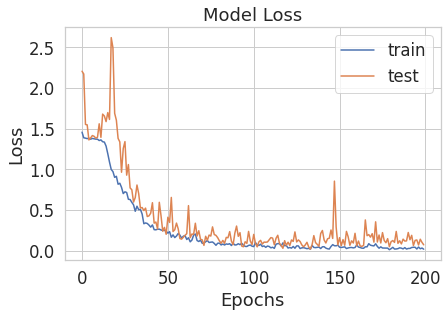

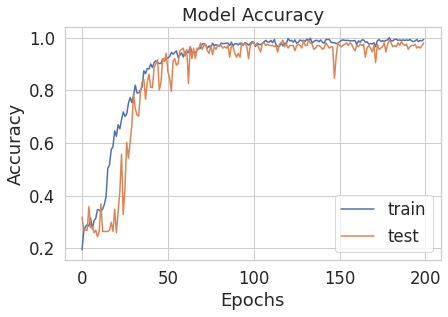

In [ ]:
batch_size = 32
epochs = 200

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_test, y_test),
                              verbose=1, steps_per_epoch=x_train.shape[0] // batch_size )
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# To save CNN model
# model.save('My_Final_model.h5')

In [ ]:
# from keras.models import load_model
# new_model1= load_model('/content/My_Final_model.h5')

In [ ]:
# new_model1.get_weights()

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 7s 1s/step - loss: 0.0716 - accuracy: 0.9801


[0.07155361771583557, 0.9800994992256165]

In [ ]:
y_pred = model.predict(x_test)>0.5
# y_pred=np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
# print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))


Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       1.00      0.96      0.98        54
           2       0.93      1.00      0.96        53
           3       1.00      1.00      1.00        56

   micro avg       0.98      0.98      0.98       201
   macro avg       0.98      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201
 samples avg       0.98      0.98      0.98       201



In [ ]:
rounded_predictions = model.predict_classes(x_test, batch_size=32, verbose=0)
rounded_predictions[1]

3

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

3

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[36,  0,  2,  0],
       [ 0, 52,  2,  0],
       [ 0,  0, 53,  0],
       [ 0,  0,  0, 56]])

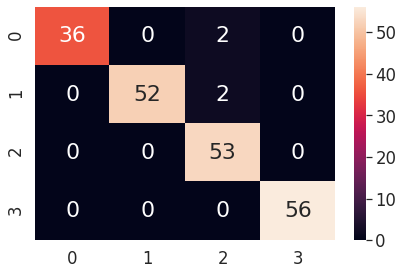

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, annot_kws={"size": 22}, fmt = "d")